# AI/ML Tutorials: Data Integration
## 2024 D4 HACK WEEK: DISASTERS, DEMOGRAPHY, DISPARITIES, AND DECISIONS

Author: Dr. Jorge Celis

**NSF AI Institute for Research on Trustworthy AI in Weather, Climate, and Coastal Oceanography (AI2ES)** 

August,2024- Seattle, Washington


The tutorial will provide a comprehensive overview of modern geospatial tools, machine learning techniques, and API access for environmental and weather data. Participants will learn how to process, analyze, and integrate diverse datasets, from census and geospatial shapefiles to satellite-derived weather information. A strong emphasis will be placed on visualization techniques to communicate key insights effectively. By focusing on both temporal and spatial resolutions, this tutorial equips participants with the knowledge and skills needed to process their data to apply it into their research projects, which have the goal of addressing critical challenges in fields such as agriculture, emergency management, and infrastructure planning.


## Table of Contents

1. **Introduction and Setup**
   - Overview of data integration
   - Required libraries
   - Setting up Python and Jupyter environments

2. **Preprocessing and Data Loading**
   - Accessing U.S. Census and American Community Survey data (ACS)
   - Working with geospatial shapefiles
   - Data integration operations (merging, spatial joins)
   - Accessing environmental and weather data through Google Earth Engine and Copernicus APIs
   - wGET Data download in Python

3. **Data Processing**
   - Working with NetCDF datasets
   - Handling time-series geospatial data
   - Temporal aggregation

4. **Data Visualization and Spatial Statistics**
   - Visualizing long-term geospatial datasets
   - Spatial visualization techniques (mapping shapefiles)
   - Basic spatial statistics (spatial summary operations)
   - Advanced spatial operations (clipping)
   - Data integration and aggregation based on attributes and geospatial features

5. **Geospatial Data Analysis**
   - Working with GeoSeries in GeoPandas
   - Select location operations with GeoDataFrame
   - Spatial overlays and joins
   - Merging spatial and non-spatial data

6. **Data Resampling and Transformation**
   - Raster operations
   - Resampling datasets to match different spatial resolutions
   - Reprojecting using GDAL

7. **Advanced Spatial Operations**
   - Linear regression model, Pearson correlation, and root mean square error (RMSE)
   - Kernel Density Estimation (KDE) for point data
   - Aggregating data within grids and polygons


# <u>I. Introduction and Setup</u>


In this tutorial, participants will be introduced to the core concepts and hands-on practices of integrating multi-modal data, with a particular emphasis on managing both temporal and spatial resolutions. This process is essential for improving the communication of weather-related risks, especially in dynamic, real-time contexts. By mastering the handling of complex datasets from diverse sources, participants will be better prepared to effectively communicate risks and contribute to research initiatives that are crucial to stakeholders in sectors like agriculture, emergency management, and infrastructure development

We will use the following libraries to facilitate data loading, transformation, and analysis:

- **pandas** and **numpy**: For general data manipulation, including handling data frames, arrays, and performing calculations.
- **geopandas**: To work with geospatial data, allowing us to perform spatial operations and handle geometries such as points, polygons, and lines.
- **geoplot**: For advanced geospatial data visualization, providing tools like kernel density plots and choropleth maps.
- **matplotlib**: For creating visualizations, including both general and geospatial plots.
- **rasterio**: To handle raster data such as satellite imagery or elevation models, enabling us to read, write, and transform raster datasets.
- **scipy**: For scientific and statistical computations, including tasks like hypothesis testing, and advanced mathematical functions.
- **shapely**: For geometric operations such as creating and analyzing shapes like polygons, lines, and points.
- **scikit-learn**: For performing machine learning tasks, including Kernel Density Estimation (KDE) and other predictive modeling techniques.
- **xarray**: Supports multi-dimensional labeled arrays and datasets, particularly useful for time-series analysis of large datasets.
- **cenpy**, **census**, **us**: These libraries are essential for accessing and manipulating U.S. Census and American Community Survey (ACS) data:
  - **cenpy**: Provides a Python interface to the U.S. Census Bureau’s APIs, allowing easy access to census data.
  - **census**: A Python wrapper around the U.S. Census Bureau’s API, facilitating direct querying of ACS and Decennial Census data.
  - **us**: A small library that helps identify U.S. states and territories by FIPS codes, abbreviations, and names, commonly used in census data.


By the end of this tutorial, our expectation is that participants will gain practical experience in:
1. Pre-processing and integrating multi-modal datasets, including weather, geospatial, and Census data, for analysis and machine learning applications.
2. Performing spatial joins, overlays, and data resampling to harmonize datasets with varying spatial and temporal resolutions.
3. Applying advanced geospatial analysis techniques, including Kernel Density Estimation (KDE), spatial regression, and raster operations to explore patterns and correlations within the data.
4. Effectively communicating data insights through visualization techniques, including time-series plots, geospatial maps, and aggregated data visualizations that support real-time decision-making and weather risk communication.

## Libraries

For libraries that are not already installed, you can install them using either `pip`, `pip3` or `conda`, depending on your environment:

- **For Jupyter Notebook users**: Use the `!pip install <library>` or `conda install -c conda-forge library` command directly in a notebook cell to install the required library. This command should not be used in your local machine’s terminal.
  
  Example:
  ```bash
  !pip install geopandas


In [53]:
# Check your current pip version 
!pip3 --version

pip 24.2 from /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pip (python 3.12)


In [61]:
# Import modules
import geopandas as gpd
import geoplot as gplt
import math
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import cenpy
import wget
import xarray as xr
from census import Census
from us import states
import os
import rasterio
from rasterio.transform import Affine
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import netCDF4 as nc
from datetime import datetime
import sklearn
import sklearn.ensemble
from scipy import stats
from tqdm import tqdm
from shapely.geometry import Polygon, box
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

### Using R in Jupyter Notebooks 

For some users, **R** might be a more commonly used tool for data integration and geospatial statistics. Fortunately, it’s possible to run **R** code directly within a Jupyter notebook using the **rpy2** package, which bridges R and Python. Below, we outline the steps to install **rpy2** and seamlessly switch between Python and R within a notebook.

#### Steps to Enable R in Jupyter Notebook:

1. **Install rpy2**:
   If you haven't already installed **rpy2**, you can do so using **conda** or **pip**. Here’s the command to install it via **conda**:
   
   ```bash
   # Install rpy2 in your conda environment
   conda install -c conda-forge rpy2

2. **Running R Code in Jupyter Notebooks**: With **rpy2** activated, you can now execute R code in any Jupyter notebook cell by prepending the `%%R` magic command. This allows you to run R code just as you would in an R environment, while staying within your Python notebook.
Here’s an example where we install and load R libraries and run basic R commands:
   
   ```R```%%R
   
          install.packages("ggplot2")  # Example: Install ggplot2 for plotting
          library(ggplot2)  # Load the ggplot2 library

           #Simple R code example
            x <- c(1, 2, 3)
            mean(x)  # Calculate the mean of a vector
            
3. **Once rpy2 is installed and activated in your Jupyter notebook**, you can seamlessly switch between Python and R code in the same notebook. This flexibility allows you to perform some operations in Python and then follow up with R analysis or visualization, all within the same workflow.

# <u>II. Preprocessing and Data Loading</u>


This section will show you how to access US Decennial Census and American Community Survey Data (ACS). It also provides a step-by-step guideline into access weather and environmental data through an API for Google Earth Engine and Copernicus.

We will display display an example to calculate and map poverty rates in the Commonwealth of California. We will pull data from the US Census Bureau’s American Community Survey (ACS) 2019.

# ACS Data

This section will show you how to access US Decennial Census and American Community Survey Data (ACS). 

We will display display an example to calculate and map poverty rates in the Commonwealth of California. We will pull data from the US Census Bureau’s American Community Survey (ACS) 2019.

To access the data, we will use the Census Data Application Programming Interface (API) to request data from U.S. Census Bureau datasets. More details about the API's queries structure, data availability, and user manual can be found [HERE](https://www.census.gov/data/developers/guidance/api-user-guide.Available_Data.html#list-tab-559651575).

The key will have a unique 40 digit text string and it can be obtained [HERE](https://api.census.gov/data/key_signup.html). It will provide you with a unique 40 digit text string. Please keep track of this number. Store it in a safe place.

Make sure to mark Activate Key once you receive the email confirmation with your key.

In [7]:
# Set API key
#c = Census("52bed1f41c2b258689638f0261f33793016d07c2")

In [63]:
# Set API key
# Source https://github.com/censusreporter/nicar20-advanced-census-python/blob/master/workshop.ipynb

c = Census("6871e29db5145699fdcbbd7da64b3eb9e49c25d4")

In [64]:
# Obtain Census variables from the 2019 ACS at the tract level for the Commonwealth of Virginia (FIPS code: 51)
# C17002_001E: count of ratio of income to poverty in the past 12 months (total)
# C17002_002E: count of ratio of income to poverty in the past 12 months (< 0.50)
# C17002_003E: count of ratio of income to poverty in the past 12 months (0.50 - 0.99)
# B01003_001E: total population
# Sources: https://api.census.gov/data/2019/acs/acs5/variables.html; https://pypi.org/project/census/
va_census = c.acs5.state_county_tract(fields = ('NAME', 'C17002_001E', 'C17002_002E', 'C17002_003E', 'B01003_001E'),
                                      state_fips = states.CA.fips,
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2019)

In [65]:
# Create a dataframe from the census data
ca_df = pd.DataFrame(va_census)

# Show the dataframe
print(ca_df.head(3))
print('Shape: ', ca_df.shape)

                                                NAME  C17002_001E  \
0  Census Tract 5079.04, Santa Clara County, Cali...       3195.0   
1  Census Tract 5085.04, Santa Clara County, Cali...       8604.0   
2  Census Tract 5085.05, Santa Clara County, Cali...       4783.0   

   C17002_002E  C17002_003E  B01003_001E state county   tract  
0          0.0          0.0       3195.0    06    085  507904  
1        485.0        321.0       8604.0    06    085  508504  
2        252.0        125.0       4871.0    06    085  508505  
Shape:  (8057, 8)


By showing the dataframe, we can see that there are 1907 rows (therefore 1907 census tracts) and 8 columns.

---

# Geospatial data: shapefiles

In this section, we'll explore how to work with geospatial data using shapefiles, a common format for storing vector data like points, lines, and polygons. Specifically, we will load a shapefile of California census tracts and reproject it to the UTM Zone 17N coordinate system.

Shapefiles are a critical resource for geographic analysis, and they can be downloaded from various online sources such as the **Census Bureau's Cartographic Boundary Files** or **TIGER/Line Shapefiles** pages. For example, U.S. census tracts and county boundaries are readily available and are often used in demographic, environmental, and economic studies.

#### Understanding FIPS Codes

The **Federal Information Processing Standards** (FIPS) codes are used to uniquely identify states and counties in the United States. For example, California’s FIPS code is **06**, which is embedded in geographic datasets to specify that the data relates to California. You’ll often encounter FIPS codes in paths, filenames, and when merging datasets based on location.

#### Loading the California Census Tract Shapefile

We’ll begin by loading the shapefile into Python using **GeoPandas**, a powerful library for handling geospatial data. After loading, we will reproject the shapefile into the **UTM Zone 17N** coordinate system to prepare for accurate spatial analysis.
When working with geospatial data, it's often necessary to reproject datasets to a more suitable coordinate system. The default CRS for many shapefiles is WGS 84 (EPSG: 4326), which uses latitude and longitude. While this is a global standard, it’s less useful for regional analysis where precise measurements are needed. UTM (Universal Transverse Mercator) uses meters as units, making it better suited for tasks like calculating distances within a state or smaller region.

```python
import geopandas as gpd

# Verify the new projection
print("Reprojected CRS:", ca_tracts_utm.crs)



In [69]:
# Access shapefile of California census tracts
ca_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_06_tract.zip")

# Reproject shapefile to UTM Zone 17N
# https://spatialreference.org/ref/epsg/wgs-84-utm-zone-17n/
ca_tract = ca_tract.to_crs(epsg = 32617)

# Print GeoDataFrame of shapefile
print(ca_tract.head(2))
print('Shape: ', ca_tract.shape)

# Check shapefile projection
print("\nThe shapefile projection is: {}".format(ca_tract.crs))

  STATEFP COUNTYFP TRACTCE        GEOID     NAME              NAMELSAD  MTFCC  \
0      06      037  139301  06037139301  1393.01  Census Tract 1393.01  G5020   
1      06      037  139302  06037139302  1393.02  Census Tract 1393.02  G5020   

  FUNCSTAT    ALAND  AWATER     INTPTLAT      INTPTLON  \
0        S  2865657       0  +34.1781538  -118.5581265   
1        S   338289       0  +34.1767230  -118.5383655   

                                            geometry  
0  POLYGON ((-3044371.273 4496550.666, -3044362.7...  
1  POLYGON ((-3041223.308 4495554.962, -3041217.6...  
Shape:  (8057, 13)

The shapefile projection is: EPSG:32617


By printing the shapefile, we can see that it has **8057 rows** (representing 8057 tracts). This matches the number of census records in our separate dataset. Perfect!

Not so fast, though.

We have a challenge: the census data and the shapefile, though corresponding to the same regions, are stored in two different variables (`ca_df` and `ca_tract` respectively). To map or analyze this data effectively, we need to connect these two datasets.

Next, we’ll merge the census data with the shapefile by matching the relevant FIPS code (**GEOID**). This will allow us to integrate demographic data directly into our geospatial analysis.

---

# Data integration relevant to ACS Data operations

## Merge operations

To tackle the problem of disconnected datasets, we can join the two dataframes based on a shared column, often referred to as a **key**. This key allows us to link the corresponding census data and the geospatial shapefile.

In our case, the **GEOID** column from `ca_tract` can serve as this key. However, in `ca_df`, the equivalent identifier is spread across three columns: **state**, **county**, and **tract**. To properly perform the merge, we need to combine these columns into a single **GEOID** column in `ca_df` so that it matches the format of the **GEOID** in `ca_tract`.

We can achieve this by concatenating the **state**, **county**, and **tract** columns from `ca_df`. This operation is similar to adding numbers or strings in Python and can be done using basic indexing with square brackets (`[]`) and the column names. Once combined, we will store the result in a new column called **GEOID**.

This step ensures that the dataframes can be merged smoothly, allowing us to integrate the demographic data directly with the geospatial information.

In [66]:
# Combine state, county, and tract columns together to create a new string and assign to new column
ca_df["GEOID"] = ca_df["state"] + ca_df["county"] + ca_df["tract"]

Printing out the first rew rows of the dataframe, we can see that the new column GEOID has been created with the values from the three columns combined.

In [67]:
# Print head of dataframe
ca_df.head(2)

NAME  C17002_001E  \
0  Census Tract 5079.04, Santa Clara County, Cali...       3195.0   
1  Census Tract 5085.04, Santa Clara County, Cali...       8604.0   

   C17002_002E  C17002_003E  B01003_001E state county   tract        GEOID  
0          0.0          0.0       3195.0    06    085  507904  06085507904  
1        485.0        321.0       8604.0    06    085  508504  06085508504

Now, we are ready to merge the two dataframes together, using the GEOID columns as the primary key. We can use the merge method in GeoPandas called on the ca_tract shapefile dataset.

In [70]:
# Join the attributes of the dataframes together
# Source: https://geopandas.org/docs/user_guide/mergingdata.html
ca_merge = ca_tract.merge(ca_df, on = "GEOID")

# Show result
print(ca_merge.head(2))
print('Shape: ', ca_merge.shape)

  STATEFP COUNTYFP TRACTCE        GEOID   NAME_x              NAMELSAD  MTFCC  \
0      06      037  139301  06037139301  1393.01  Census Tract 1393.01  G5020   
1      06      037  139302  06037139302  1393.02  Census Tract 1393.02  G5020   

  FUNCSTAT    ALAND  AWATER  ...      INTPTLON  \
0        S  2865657       0  ...  -118.5581265   
1        S   338289       0  ...  -118.5383655   

                                            geometry  \
0  POLYGON ((-3044371.273 4496550.666, -3044362.7...   
1  POLYGON ((-3041223.308 4495554.962, -3041217.6...   

                                              NAME_y C17002_001E  C17002_002E  \
0  Census Tract 1393.01, Los Angeles County, Cali...      4445.0        195.0   
1  Census Tract 1393.02, Los Angeles County, Cali...      5000.0        543.0   

   C17002_003E  B01003_001E  state county   tract  
0         54.0       4445.0     06    037  139301  
1        310.0       5000.0     06    037  139302  

[2 rows x 21 columns]
Shape:  (8057

Success! We still have 8057 rows, indicating that all or most of the rows were successfully matched. The census data has now been integrated with the shapefile data, and the combined dataset reflects both demographic and geospatial information.

A few important notes on joining dataframes:
- **Key columns don't need the same name:** The columns we use for joining don't have to share the same name across dataframes. What matters is the content and structure of the values.
- **One-to-One Relationship:** In this case, the join was a one-to-one relationship, where each record in the `ca_df` dataframe matched exactly one record in `ca_tract`.
  
However, other types of joins—such as **many-to-one**, **one-to-many**, or **many-to-many**—are also possible. These relationships can require additional steps or considerations, especially when dealing with more complex datasets.

For more information about different types of joins and how they relate to spatial data, consult the [Esri ArcGIS documentation](https://www.esri.com/en-us/arcgis/products/arcgis-desktop/resources).

---

# Accessing Environmental and Weather Data Using APIs

Accessing environmental and weather data has become increasingly easier with the use of Application Programming Interfaces (APIs). APIs allow users to connect to various databases and data platforms to retrieve datasets for analysis in real-time. In this tutorial, we will explore two powerful platforms for accessing geospatial and environmental data:

- **Google Earth Engine (GEE)**: A cloud-based platform for planetary-scale environmental data analysis. GEE hosts satellite imagery, geospatial datasets, and weather data.
- **Copernicus Climate Data Store (CDSAPI)**: The European Union's platform that provides access to a wide range of climate and weather data, including the ERA5 datasets, which are the latest global atmospheric reanalysis datasets.

## Accessing Data with APIs

APIs make it possible to programmatically retrieve environmental and weather datasets by interacting with platforms such as GEE and CDSAPI. This enables users to automate their workflows, integrate real-time data into their models, and perform large-scale environmental analysis. Below, we'll go through the process of using both Google Earth Engine and Copernicus CDSAPI to access and download environmental and weather data.

---

## Data through Google Earth Engine (GEE)

Google Earth Engine (GEE) is a cloud-based platform designed for large-scale environmental data analysis. It hosts an extensive collection of satellite imagery and geospatial datasets, making it a powerful tool for analyzing weather patterns, environmental conditions, and land cover dynamics.

In this section, we'll explore how to work with raster data using GEE, focusing on weather data (e.g., ERA5) and environmental datasets (e.g., MODIS, Landsat). You will learn how to access, manipulate, and visualize these datasets using the Python libraries `geemap` and `earthengine-api`.

### Key Libraries:
- **geemap**: A Python package for interactive mapping with GEE, simplifying access to GEE data and analyses.
- **earthengine-api**: The official Python client for interacting with the Google Earth Engine platform.

Before using GEE, follow these steps to authenticate and initialize your environment.

---

### Initial Setup for Using Google Earth Engine API

To use the GEE API in Python, you need to complete the following steps:

### 1. Set Up a Cloud Project

To use GEE, you must first set up a Google Cloud project. You can do this directly through the Google Cloud Console or the Earth Engine Code Editor.

#### Create a Cloud Project:
1. Go to the [Google Cloud Console project creation page](https://console.cloud.google.com/projectcreate) and create a new project.  
   Alternatively, create a project through the [Earth Engine Code Editor](https://developers.google.com/earth-engine/guides/code_editor_quickstart), which will automatically enable the Earth Engine API.

2. Manage your Google Cloud projects from the [Google Cloud Console](https://console.cloud.google.com/).

---

### 2. Enable the Earth Engine API

Once your project is created, you need to enable the Earth Engine API.

#### Steps to Enable the API:
1. Visit the [Earth Engine API page](https://console.cloud.google.com/apis/api/earthengine.googleapis.com/overview).

2. Select your project and click **Enable** to activate the Earth Engine API for your project.

---

### 3. Create a Service Account and Private Key

You will need to create a service account and a private key to authenticate your machine with GEE.

#### Instructions for Service Account Creation:
- Follow the official documentation for [service account creation and private key generation](https://developers.google.com/earth-engine/guides/service_account#use-a-service-account-with-a-private-key).

---

### 4. Authenticate Your Local Machine or HPC System (e.g., OSCER)

After setting up the project and enabling the Earth Engine API, you need to authenticate your machine to access GEE from Python.

#### Authentication Command:
- Open a terminal and run the following command:
  ```bash
  earthengine authenticate

### 5. Access GEE data using python!

```python

# Initialize Earth Engine
ee.Initialize()

# Check if the module is imported successfully
print("Earth Engine Python API imported successfully!")

import ee
from IPython.display import Image

# Replace the service account and credential information with your own
service_account = 'your-service-account@your-project-id.iam.gserviceaccount.com'
credentials = ee.ServiceAccountCredentials(service_account, 'path-to-your-private-key.json')

# Load a Landsat image
image = ee.Image('LANDSAT/LC08/C01/T1_TOA/LC08_044034_20140318')

# Define visualization parameters
vis_params = {
    'bands': ['B4', 'B3', 'B2'],  # RGB bands for Landsat 8
    'min': 0,
    'max': 0.3
}

# Get a thumbnail URL for the image
thumb_url = image.getThumbUrl({
    'dimensions': 256,  # Specify the size of the thumbnail (e.g., 256x256 pixels)
    'region': image.geometry().bounds().getInfo()['coordinates'],  # Use the image boundary as the region
    **vis_params  # Include visualization parameters
})

# Display the thumbnail image
Image(url=thumb_url)


---

## Accessing Data with Copernicus CDSAPI

The Copernicus Climate Data Store (CDS) API is a service that provides access to climate data, including global reanalysis datasets such as ERA5. You can use the CDSAPI Python library to download data directly into your Python environment.

### 1. Sign Up and Obtain the API Key

To use the CDSAPI, you will first need to sign up for an account and obtain your API key.

1. Create an account at the [Copernicus Climate Data Store](https://cds.climate.copernicus.eu/user/register).
2. After logging in, navigate to your user profile by clicking on your username at the top right of the page.
3. Under your profile, you will find your **API key** in the following format:
    ```
    url: https://cds.climate.copernicus.eu/api/v2
    key: your-unique-key
    ```

Make sure to copy and store this key as you will need it to access the data programmatically.

### 2. Install the `cdsapi` Python Library

You will need to install the `cdsapi` Python package to access the data via API. You can install it using pip:

```bash
pip install cdsapi

```python
import cdsapi

# Initialize the CDSAPI client
c = cdsapi.Client()

# Request ERA5 reanalysis data for temperature
c.retrieve(
    'reanalysis-era5-single-levels',
    {
        'product_type': 'reanalysis',
        'variable': '2m_temperature',
        'year': '2023',
        'month': '01',
        'day': '01',
        'time': '12:00',
        'format': 'netcdf',  # Output format
    },
    'output.nc'  # Output filename
)


---
##  wGET Data download in Python

In [3]:

import wget

# Download the datasets using Python's wget module
wget.download('http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/sst.mon.mean.trefadj.anom.1880to2018.nc')
#wget.download('http://portal.nersc.gov/project/dasrepo/AGU_ML_Tutorial/nino34.long.anom.data.txt')
#wget.download('http://portal.nersc.gov/project/dasrepo/AMS_ML_Tutorial/MPI_tas_anomalies_regridded.nc')
#wget.download('http://portal.nersc.gov/project/dasrepo/AMS_ML_Tutorial/CNRM_tas_anomalies_regridded.nc')

100% [................................................] 5287732392 / 5287732392

'CNRM_tas_anomalies_regridded.nc'

### Sample Data
*   [Cobe Sea-Surface Temperature Dataset:](https://psl.noaa.gov/data/gridded/data.cobe.html): this is a dataset of historical sea surface temperatures form 1880 to 2018
*   [Nino3.4 Indices](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/): The Nino3.4 index measures the 3-month rolling average of equatorial Pacific Ocean temperature anomalies.
*   CNRM-CM5 pre-industrial control run climate model surface temperature
*   Max Planck Institute CMIP5 pre-industrial control run surface temperature

More information about the climate models can be found [here](https://esgf-node.llnl.gov/projects/cmip5/).

The pre-industrial control runs are climate model scenarios that assume that there are no anthropogenic emissions. The reason that we use the "pre-industrial control" run of the climate models as opposed to the historical runs is that the former runs are far longer, allowing us to have more data for neural network training.


# <u>III. Data procesing</u>


Next, we will group all the census tracts within the same county (COUNTYFP) and aggregate the poverty and population values for those tracts within the same county. We can use the dissolve function in GeoPandas, which is the spatial version of groupby in pandas. We use dissolve instead of groupby because the former also groups and merges all the geometries (in this case, census tracts) within a given group (in this case, counties).
# NetCDF

In [59]:
# Let's look at the information in our dataset
%matplotlib inline
import netCDF4 as nc

# Open the dataset
dataset = nc.Dataset('sst.mon.mean.trefadj.anom.1880to2018.nc')


# Access latitude and longitude variables
latitudes = dataset.variables['lat'][:]
longitudes = dataset.variables['lon'][:]

# Calculate the spatial resolution by taking the difference between consecutive lat/lon values
lat_resolution = latitudes[1] - latitudes[0]
lon_resolution = longitudes[1] - longitudes[0]

print(f"Spatial resolution: {lat_resolution} degrees (latitude), {lon_resolution} degrees (longitude)")

# Alternatively, check the variable metadata to see if resolution is included
print(dataset.variables['lat'])  # Latitude metadata
print(dataset.variables['lon'])  # Longitude metadata

# Check dimensions (time, latitude, longitude)
print(f"Dimensions: {dataset.dimensions.keys()}")
print(f"Time steps: {dataset.dimensions['time'].size}")
print(f"Spatial resolution (lat, lon): {len(dataset.dimensions['lat'])}, {len(dataset.dimensions['lon'])}")

# Access attributes of the dataset
print(f"Time unit: {dataset.variables['time'].units}")
print(f"Latitude range: {dataset.variables['lat'][:].min()} to {dataset.variables['lat'][:].max()}")
print(f"Longitude range: {dataset.variables['lon'][:].min()} to {dataset.variables['lon'][:].max()}")


Spatial resolution: -1.0 degrees (latitude), 1.0 degrees (longitude)
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (180,)
filling off
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (360,)
filling off
Dimensions: dict_keys(['time', 'lon', 'lat'])
Time steps: 1668
Spatial resolution (lat, lon): 180, 360
Time unit: days since 1891-1-1 00:00:00
Latitude range: -89.5 to 89.5
Longitude range: 0.5 to 359.5


In [28]:
# Inspect the details of each variable
for var in dataset.variables:
    print(f"Variable: {var}")
    print(dataset.variables[var])
    print("\n")

Variable: time
<class 'netCDF4._netCDF4.Variable'>
float64 time(time)
    standard_name: time
    long_name: Time
    units: days since 1891-1-1 00:00:00
    calendar: standard
    axis: T
unlimited dimensions: time
current shape = (1668,)
filling off


Variable: lon
<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
unlimited dimensions: 
current shape = (360,)
filling off


Variable: lat
<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
unlimited dimensions: 
current shape = (180,)
filling off


Variable: sst
<class 'netCDF4._netCDF4.Variable'>
float32 sst(time, lat, lon)
    long_name: Monthly Means of Global Sea Surface Temperature
    units: degC
    _FillValue: 1e+20
    missing_value: 1e+20
    var_desc: Sea Surface Temperature
    dataset: COBE-SST2 Sea Surface Temperature
    statistic: Mean
    

In [30]:
#You can extract the actual data from each variable like this:

# Extract the time, longitude, latitude, and sea surface temperature (SST) data
time = dataset.variables['time'][:]
lon = dataset.variables['lon'][:]
lat = dataset.variables['lat'][:]
sst = dataset.variables['sst'][:]  # Sea Surface Temperature anomalies

# Handling time-series geospatial data

## Understanding the time variable
Usually, the time variable in NetCDF files is in units such as "days since a certain date" or "months since a certain date." To convert the time variable into a human-readable date format, you can check the units and use the num2date function.

In [37]:
from netCDF4 import num2date

# Get the time units and calendar
time_units = dataset.variables['time'].units
calendar = dataset.variables['time'].calendar

# Convert time to readable dates
dates = num2date(time, units=time_units, calendar=calendar)

# Print the first 12 dates
print(calendar[:12])
print(dates[:12])

standard
[cftime.DatetimeGregorian(1880, 1, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 2, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 3, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 4, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 5, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 6, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 7, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 8, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 9, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 10, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 11, 16, 12, 0, 0, 0, has_year_zero=False)
 cftime.DatetimeGregorian(1880, 12, 16, 12, 0, 0, 0, has_year_zero=False)]


The timestamps for the sst data are structured to represent the middle of each month, with values like 1880-01-16 12:00:00, 1880-02-16 12:00:00, and so on. This indicates that each data point represents the average sea surface temperature anomaly for a particular month, starting in January 1880. Therefore, the dataset provides monthly SST anomalies for each grid cell or location.

In [39]:
from datetime import datetime

# Convert the cftime objects to standard datetime objects
converted_dates = [datetime(d.year, d.month, d.day) for d in dates]

# Check the converted dates
print(converted_dates[:10])

[datetime.datetime(1880, 1, 16, 0, 0), datetime.datetime(1880, 2, 16, 0, 0), datetime.datetime(1880, 3, 16, 0, 0), datetime.datetime(1880, 4, 16, 0, 0), datetime.datetime(1880, 5, 16, 0, 0), datetime.datetime(1880, 6, 16, 0, 0), datetime.datetime(1880, 7, 16, 0, 0), datetime.datetime(1880, 8, 16, 0, 0), datetime.datetime(1880, 9, 16, 0, 0), datetime.datetime(1880, 10, 16, 0, 0)]


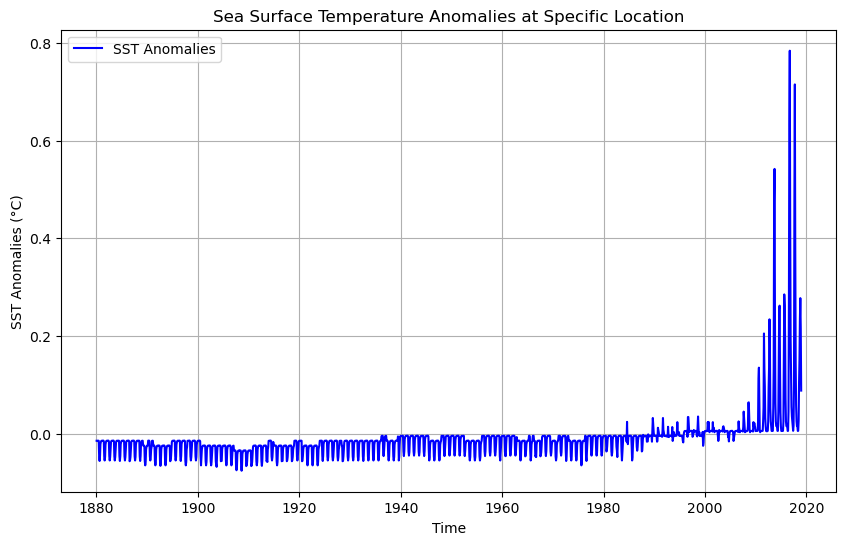

In [40]:
import matplotlib.pyplot as plt

# Plot the SST time series using the converted dates
plt.figure(figsize=(10, 6))
plt.plot(converted_dates, sst_series, label='SST Anomalies', color='blue')
plt.title('Sea Surface Temperature Anomalies at Specific Location')
plt.xlabel('Time')
plt.ylabel('SST Anomalies (°C)')
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/opt/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


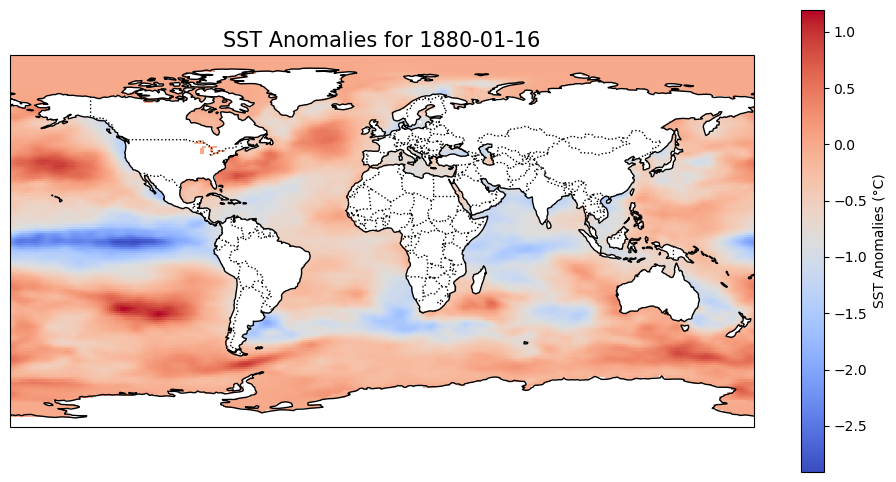

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Load the dataset
dataset = nc.Dataset('sst.mon.mean.trefadj.anom.1880to2018.nc')

# Extract the variables
sst = dataset.variables['sst'][:]  # Sea Surface Temperature anomalies
lon = dataset.variables['lon'][:]  # Longitude
lat = dataset.variables['lat'][:]  # Latitude
time = dataset.variables['time'][:]  # Time

# Select a specific date by index (e.g., the first time index)
time_idx = 0  # Index for the date you want to visualize
sst_specific_time = sst[time_idx, :, :]  # Extract SST anomalies for that time

# Convert the time index to a human-readable date
from netCDF4 import num2date
dates = num2date(time, units=dataset.variables['time'].units)
selected_date = dates[time_idx]

# Create the plot
plt.figure(figsize=(12, 6))

# Set up the map with a Plate Carree projection
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()

# Plot SST anomalies with a color bar
sst_plot = ax.pcolormesh(lon, lat, sst_specific_time, transform=ccrs.PlateCarree(), cmap='coolwarm')
plt.colorbar(sst_plot, ax=ax, orientation='vertical', label='SST Anomalies (°C)')

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f'SST Anomalies for {selected_date.strftime("%Y-%m-%d")}', fontsize=15)

# Show the plot
plt.show()

# Temporal Aggregation 

In this section, we will focus on aggregating Sea Surface Temperature (SST) anomalies over different time periods and visualizing them as a time series. By aggregating SST anomalies annually and every 30 years, we can observe long-term trends and patterns in sea surface temperature deviations.

### Objective

Our goal is to aggregate the monthly SST anomalies into annual means and 30-year means to smooth out short-term fluctuations and highlight long-term trends. This is particularly useful for understanding phenomena such as global warming and climate cycles.

### Steps for Temporal Aggregation

To achieve temporal aggregation, we'll create our own aggregation function to calculate the mean SST anomalies for:
1. **Annual Aggregation**: The mean SST anomalies for each year.
2. **30-Year Aggregation**: The mean SST anomalies for every 30 years.

### Libraries relevant to the Temporal Aggregation and Plot Time Series

```python
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
from netCDF4 import num2date


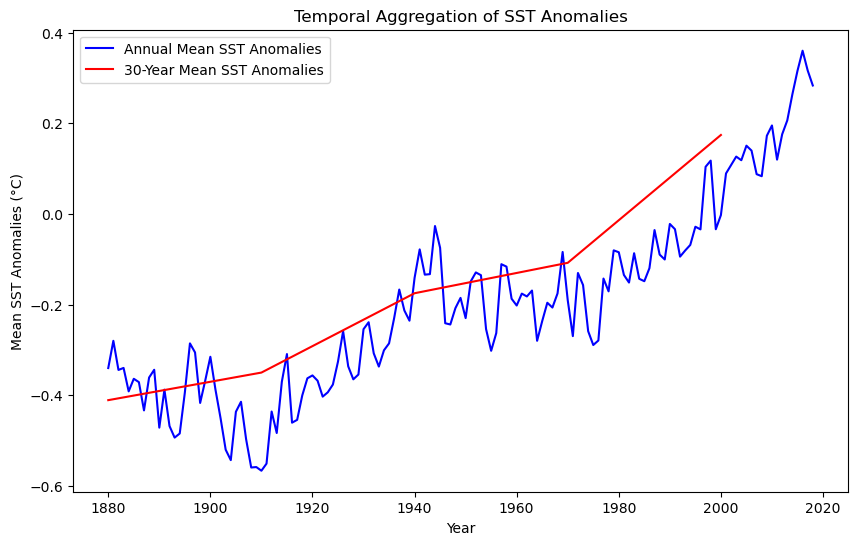

In [42]:
# Extract variables
sst = dataset.variables['sst'][:]  # Sea Surface Temperature anomalies
time = dataset.variables['time'][:]  # Time in months since 1880
dates = num2date(time, units=dataset.variables['time'].units)

# Convert dates to a usable format for aggregation
years = np.array([date.year for date in dates])

# Function to aggregate data
def aggregate_data(sst, years, aggregation_period):
    unique_years = np.arange(years.min(), years.max() + 1, aggregation_period)
    sst_aggregated = []
    for year in unique_years:
        # Select data within the aggregation period
        indices = np.where((years >= year) & (years < year + aggregation_period))[0]
        # Compute the mean over the selected period
        sst_aggregated.append(np.nanmean(sst[indices, :, :], axis=0))  # Mean SST anomalies over the period
    return unique_years, sst_aggregated

# Aggregate data annually (1 year period)
# In our new function the first column is the variable (most datasets have mutiple variables), years, and then the number of years
years_annual, sst_annual = aggregate_data(sst, years, 1)

# Aggregate data every 30 years
years_30_years, sst_30_years = aggregate_data(sst, years, 30)

# Plotting the aggregated SST anomalies as time series
plt.figure(figsize=(10, 6))

# Annual aggregation plot
plt.plot(years_annual, [np.nanmean(s) for s in sst_annual], label='Annual Mean SST Anomalies', color='blue')

# 30-year aggregation plot
plt.plot(years_30_years, [np.nanmean(s) for s in sst_30_years], label='30-Year Mean SST Anomalies', color='red')

# Add titles and labels
plt.title('Temporal Aggregation of SST Anomalies')
plt.xlabel('Year')
plt.ylabel('Mean SST Anomalies (°C)')
plt.legend()

# Show the plot
plt.show()

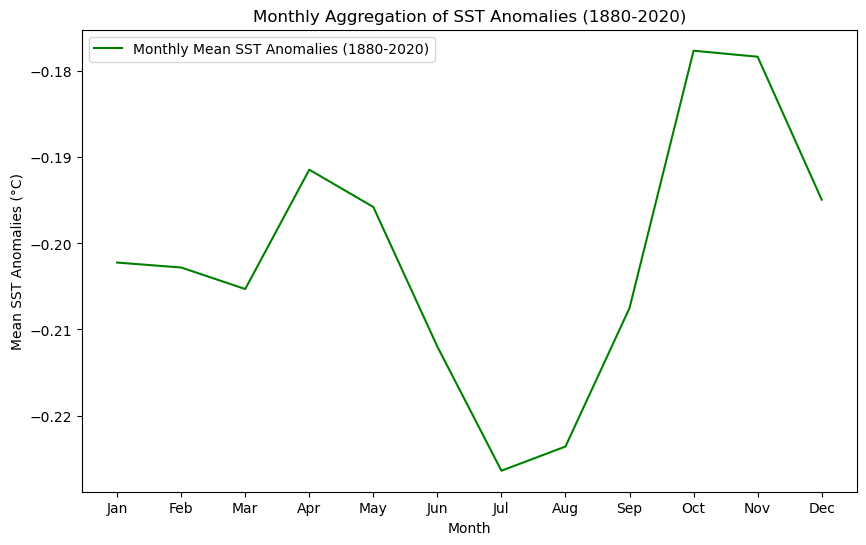

In [44]:
# Convert dates to a usable format
years = np.array([date.year for date in dates])
months = np.array([date.month for date in dates])

# Filter the data for a specific year range (2000 to 2020)
year_start = 1880
year_end = 2020
indices_range = np.where((years >= year_start) & (years <= year_end))[0]

sst_range = sst[indices_range, :, :]  # SST anomalies in the desired year range
years_range = years[indices_range]
months_range = months[indices_range]

# Function to aggregate SST anomalies by month
def aggregate_by_month(sst, months, aggregation_period=1):
    """Aggregates SST anomalies by month over multiple years."""
    sst_monthly_mean = []
    for month in range(1, 13):  # Loop through each month (1 to 12)
        # Select data for the specific month across all years
        indices = np.where(months == month)[0]
        # Compute the mean over the selected month period
        sst_monthly_mean.append(np.nanmean(sst[indices, :, :], axis=0))  # Monthly mean SST anomalies
    return np.arange(1, 13), sst_monthly_mean  # Return months and aggregated SST

# Perform monthly aggregation for the year range
months_agg, sst_monthly = aggregate_by_month(sst_range, months_range)

# Plot the results (mean SST anomaly for each month in the year range)
plt.figure(figsize=(10, 6))

# Plot monthly mean SST anomalies
plt.plot(months_agg, [np.nanmean(s) for s in sst_monthly], label=f'Monthly Mean SST Anomalies ({year_start}-{year_end})', color='green')

# Add titles and labels
plt.title(f'Monthly Aggregation of SST Anomalies ({year_start}-{year_end})')
plt.xlabel('Month')
plt.ylabel('Mean SST Anomalies (°C)')
plt.xticks(months_agg, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show the plot
plt.show()

You will see a difference in the curve for the 1880-2020 period between the previous graph and the next one, due to the scale. Despite optics, the values are the same.

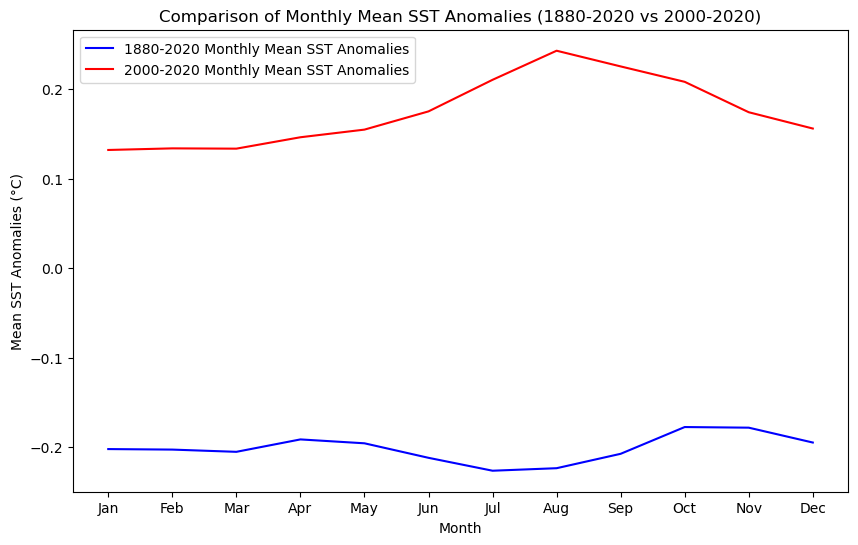

In [45]:
# Filter the data for the full range (1880-2020) and the specific range (2000-2020)
indices_full_range = np.where((years >= 1880) & (years <= 2020))[0]
indices_recent_range = np.where((years >= 2000) & (years <= 2020))[0]

sst_full_range = sst[indices_full_range, :, :]  # SST anomalies for 1880-2020
sst_recent_range = sst[indices_recent_range, :, :]  # SST anomalies for 2000-2020
months_full_range = months[indices_full_range]
months_recent_range = months[indices_recent_range]


# Aggregate SST anomalies by month for both ranges
months_full, sst_full_monthly = aggregate_by_month(sst_full_range, months_full_range)
months_recent, sst_recent_monthly = aggregate_by_month(sst_recent_range, months_recent_range)

# Plot the comparison of Monthly Mean SST Anomalies for both periods
plt.figure(figsize=(10, 6))

# Plot monthly mean SST anomalies for the full range (1880-2020)
plt.plot(months_full, [np.nanmean(s) for s in sst_full_monthly], label='1880-2020 Monthly Mean SST Anomalies', color='blue')

# Plot monthly mean SST anomalies for the recent range (2000-2020)
plt.plot(months_recent, [np.nanmean(s) for s in sst_recent_monthly], label='2000-2020 Monthly Mean SST Anomalies', color='red')

# Add titles and labels
plt.title('Comparison of Monthly Mean SST Anomalies (1880-2020 vs 2000-2020)')
plt.xlabel('Month')
plt.ylabel('Mean SST Anomalies (°C)')
plt.xticks(months_full, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Show the plot
plt.show()

# <u>III. Data Visualization and Spatial Statistics</u>

Since the plots above focus on the temporal component only, leaving behind the spatial dimension of the data, we will map some of the months. Additional representations, such as a 3-D graph could be included to display the changes across times and latitudes and longitutes.
To create a comparison of sea surface temperature (SST) anomalies for the months of March, April, July, and October between the two periods (1880-2020 and 2000-2020), we will create subplots for each month, using the same color scale for better comparison.
#### Steps:

1. **Temporal Aggregation**: We aggregate the SST anomalies for each month (March, April, July, and October) by averaging the SST values over the entire time period for both ranges (1880-2020 and 2000-2020).
2. **Color Scale**: To ensure a consistent comparison, we use the same color scale (`vmin=-2`, `vmax=2`) for both time periods, highlighting the variations in anomalies across different timeframes.
3. **Map Plotting**: Using Cartopy, we plot global maps with SST anomalies for each selected month and time period. The upper row represents the 1880-2020 period, while the lower row represents the 2000-2020 period.

#### Output:

- **Top Row**: SST anomalies for the months of March, April, July, and October between 1880 and 2020.
- **Bottom Row**: SST anomalies for the same months, but for the period from 2000 to 2020.

This comparison allows us to visualize the changes in sea surface temperature anomalies over time and across different months, providing insights into long-term ocean temperature trends and their potential implications for climate change.


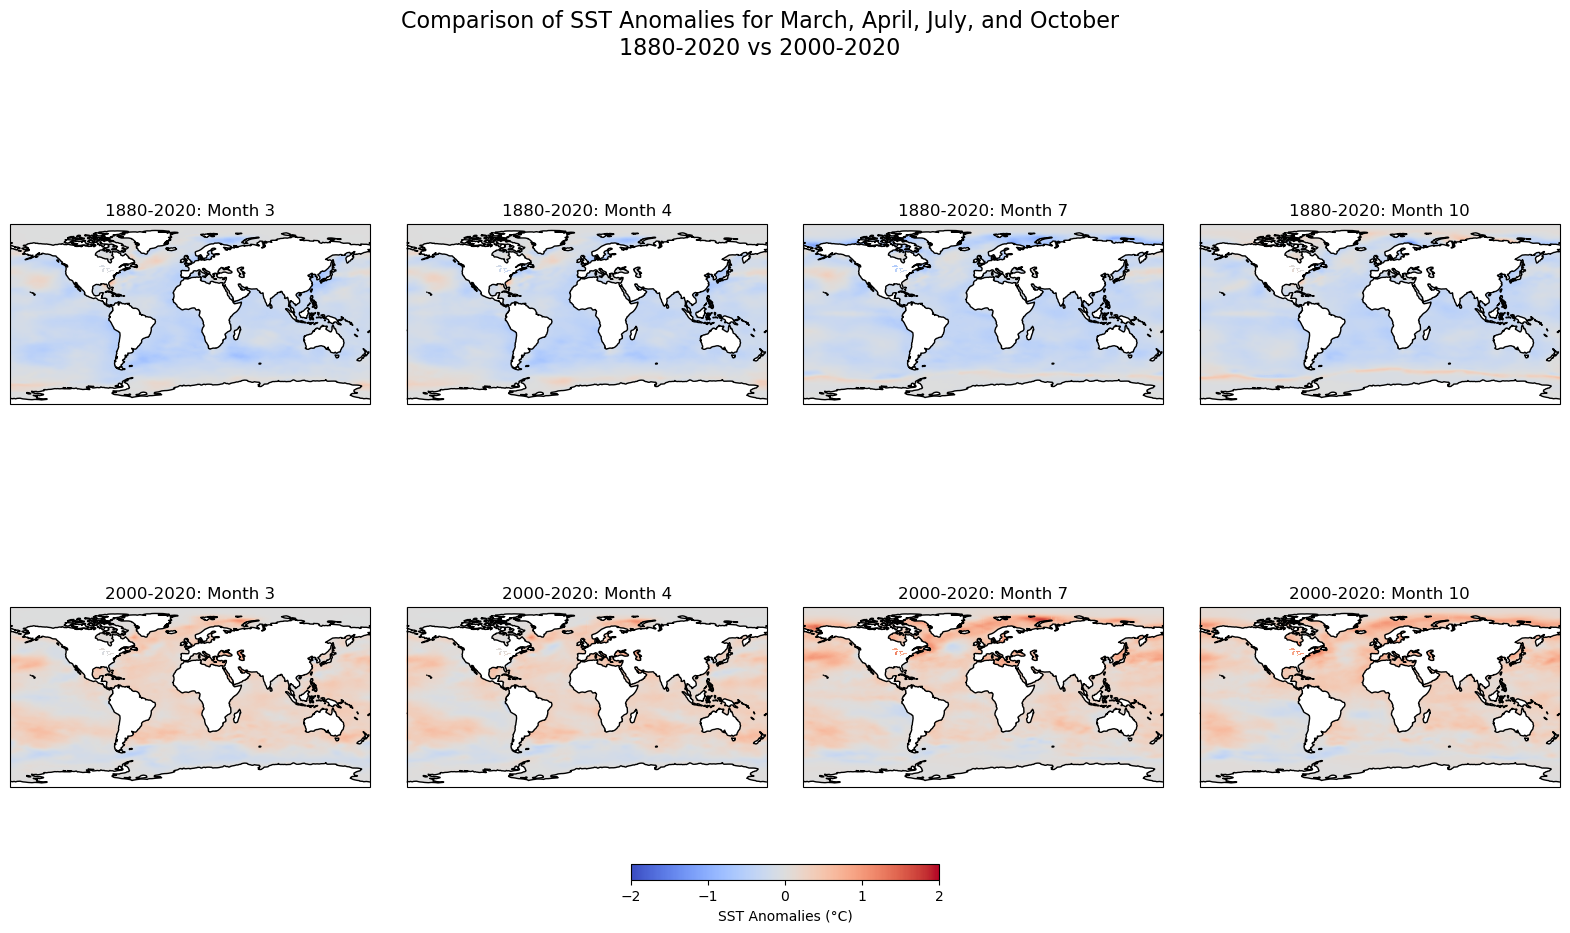

In [46]:
# Define the months of interest (March, April, July, and October)
months_of_interest = [3, 4, 7, 10]  # Corresponding to March, April, July, October

# Helper function to calculate monthly averages
def calculate_monthly_averages(sst_data, months_data, target_month):
    month_indices = np.where(months_data == target_month)[0]
    return np.nanmean(sst_data[month_indices, :, :], axis=0)

# Set up figure for subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Define color scale based on min/max of anomalies for consistent comparison
vmin = -2  # Adjust based on your data range
vmax = 2   # Adjust based on your data range

# Plot the maps for each of the four months (for both time ranges)

# Plot the 1880-2020 anomalies
for i, month in enumerate(months_of_interest):
    ax = axes[0, i]
    ax.coastlines()
    ax.set_title(f'1880-2020: Month {month}')
    
    # Calculate and plot anomalies for the specific month
    monthly_avg_1880_2020 = calculate_monthly_averages(sst_full_range, months_full_range, month)
    im = ax.pcolormesh(lon, lat, monthly_avg_1880_2020, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Plot the 2000-2020 anomalies
for i, month in enumerate(months_of_interest):
    ax = axes[1, i]
    ax.coastlines()
    ax.set_title(f'2000-2020: Month {month}')
    
    # Calculate and plot anomalies for the specific month
    monthly_avg_2000_2020 = calculate_monthly_averages(sst_recent_range, months_recent_range, month)
    im = ax.pcolormesh(lon, lat, monthly_avg_2000_2020, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Add colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('SST Anomalies (°C)')

# Add main title
plt.suptitle('Comparison of SST Anomalies for March, April, July, and October\n1880-2020 vs 2000-2020', fontsize=16)

# Show plot
plt.show()

# Simple shapefile visualization

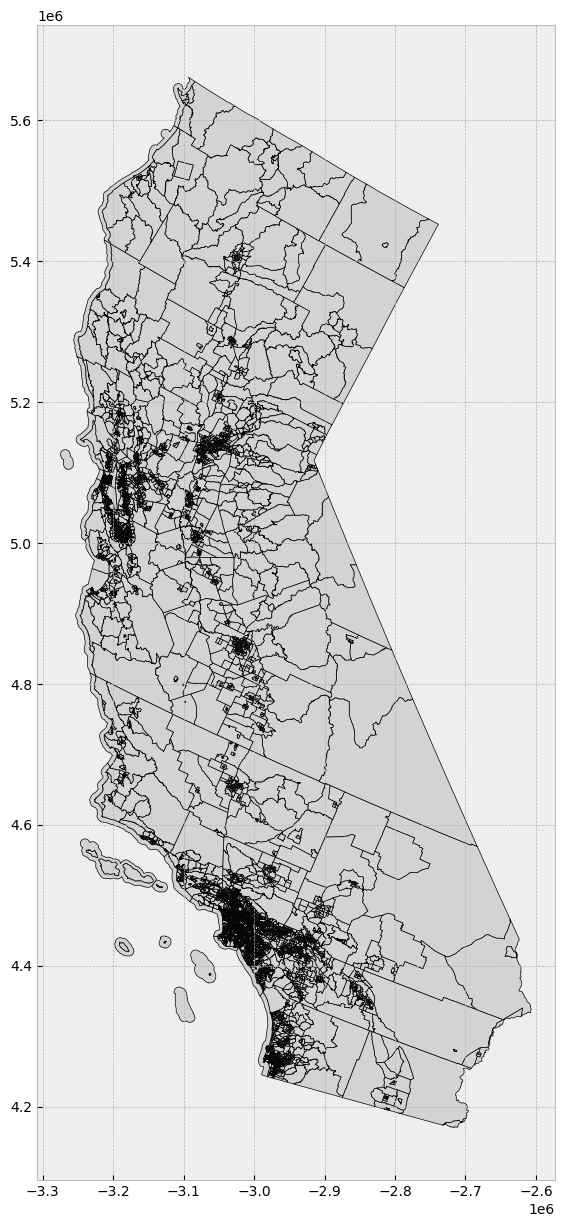

In [32]:
# Basic plot of the map
fig, ax = plt.subplots(1, 1, figsize=(10, 15))
ca_merge.plot(ax=ax, edgecolor='black', color='lightgrey')

plt.show()

# Basic spatial statistics

Spatial data are often at a different granularity than needed. For example, you might have data on sub-national track level units (higher spatial resolution), but you’re actually interested in studying patterns at the level of counties.

In a non-spatial setting, when you need summary statistics of the data, you can aggregate data using the groupby() function. But for spatial data, you sometimes also need to aggregate geometric features. In the GeoPandas library, you can aggregate geometric features using the dissolve() function.

dissolve() can be thought of as doing three things:

* it dissolves all the geometries within a given group together into a single geometric feature (using the union_all() method), and
* it aggregates all the rows of data in a group using groupby.aggregate, and
* it combines those two results.

Use the link here to find more information about merging and spatial joint from [Geopandas.org](https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html)


In [22]:
# Dissolve and group the census tracts within each county and aggregate all the values together
# Source: https://geopandas.org/docs/user_guide/aggregation_with_dissolve.html

# Create new dataframe from select columns
ca_poverty_tract = ca_merge[["STATEFP", "COUNTYFP", "TRACTCE", "GEOID", "geometry", "C17002_001E", "C17002_002E", "C17002_003E", "B01003_001E"]]

# Show dataframe
print(ca_poverty_tract.head(2))
print('Shape: ', ca_poverty_tract.shape)

ca_poverty_county = ca_poverty_tract.dissolve(by = 'COUNTYFP', aggfunc = 'sum')

# Show dataframe
print(ca_poverty_county.head(2))
print('Shape: ', ca_poverty_county.shape)

  STATEFP COUNTYFP TRACTCE        GEOID  \
0      06      037  139301  06037139301   
1      06      037  139302  06037139302   

                                            geometry  C17002_001E  \
0  POLYGON ((-3044371.273 4496550.666, -3044362.7...       4445.0   
1  POLYGON ((-3041223.308 4495554.962, -3041217.6...       5000.0   

   C17002_002E  C17002_003E  B01003_001E  
0        195.0         54.0       4445.0  
1        543.0        310.0       5000.0  
Shape:  (8057, 9)
                                                   geometry  \
COUNTYFP                                                      
001       POLYGON ((-3173009.175 5031281.009, -3173020.3...   
003       POLYGON ((-2938609.541 5086604.727, -2938597.7...   

                                                    STATEFP  \
COUNTYFP                                                      
001       0606060606060606060606060606060606060606060606...   
003                                                      06   

         

We can estimate the poverty rate by dividing the sum of C17002_002E (ratio of income to poverty in the past 12 months, < 0.50) and C17002_003E (ratio of income to poverty in the past 12 months, 0.50 - 0.99) by B01003_001E (total population).

Side note: Notice that C17002_001E (ratio of income to poverty in the past 12 months, total), which theoretically should count everyone, does not exactly match up with B01003_001E (total population). We’ll disregard this for now since the difference is not too significant.

In [23]:
# Get poverty rate and store values in new column
ca_poverty_county["Poverty_Rate"] = (ca_poverty_county["C17002_002E"] + ca_poverty_county["C17002_003E"]) / ca_poverty_county["B01003_001E"] * 100

# Show dataframe
ca_poverty_county.head(2)

geometry  \
COUNTYFP                                                      
001       POLYGON ((-3173009.175 5031281.009, -3173020.3...   
003       POLYGON ((-2938609.541 5086604.727, -2938597.7...   

                                                    STATEFP  \
COUNTYFP                                                      
001       0606060606060606060606060606060606060606060606...   
003                                                      06   

                                                    TRACTCE  \
COUNTYFP                                                      
001       4414024415014415214415224416014416024418004419...   
003                                                  010000   

                                                      GEOID  C17002_001E  \
COUNTYFP                                                                   
001       0600144140206001441501060014415210600144152206...    1630291.0   
003                                             06003010000       1039.0   

          C17002_002E  C17002_003E  B01003_001E  Poverty_Rate  
COUNTYFP                                                       
001           80655.0      80926.0    1656754.0      9.752866  
003              71.0        134.0       1039.0     19.730510

Text(0.5, 1.0, 'Poverty Rates (%) in California')

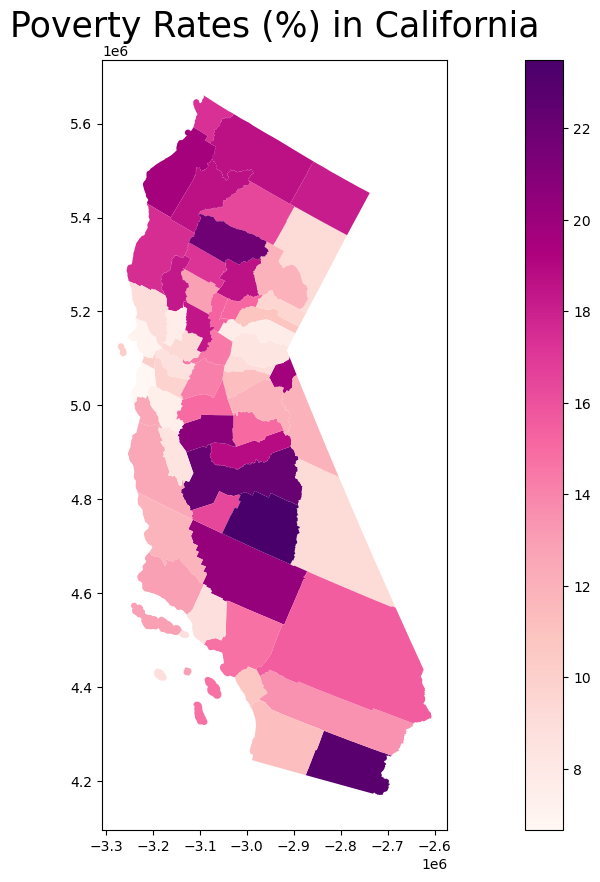

In [24]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (20, 10))

# Plot data
# Source: https://geopandas.readthedocs.io/en/latest/docs/user_guide/mapping.html
ca_poverty_county.plot(column = "Poverty_Rate",
                       ax = ax,
                       cmap = "RdPu",
                       legend = True)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Poverty Rates (%) in California', fontdict = {'fontsize': '25', 'fontweight' : '3'})

# Data integration and aggregation based on attributes and geospatial features

Subsetting and extracting data is useful when we want to select or analyze a portion of the dataset based on a feature’s location, attribute, or its spatial relationship to another dataset.

In this section, we will explore three ways that data from a GeoDataFrame can be subsetted and extracted: clip, select location by attribute, and select by location.

To run this notebook, download the county boundaries shapefile and well locations from the following sources:
- [County Boundaries (Shapefile)](https://gis.data.ca.gov/datasets/ce721c35ab7e4e4b89ef2080b4c331f6_0/explore?location=36.984277%2C-119.273117%2C6.43)
- [PowerPlants (Shapefile)](https://gis.data.ca.gov/datasets/4a702cd67be24ae7ab8173423a768e1b_0/explore?location=35.980817%2C-102.595343%2C4.96)

Once downloaded, place them in a folder and update the file paths accordingly.

We will also create a rectangle over a part of Southern California. We have identified coordinates to use for this rectangle, but you can also use bbox finder to generate custom bounding boxes and obtain their coordinates.

In [71]:
# We will continue our focus in California. The link below gives access to additional datasets
# Source: https://gis.data.ca.gov/

# County boundaries
counties = gpd.read_file("/Users/jc/Downloads/California_Counties/California_Counties.shp")

# Well locations
powerplants = gpd.read_file("/Users/jc/Downloads/Power_Plant/California_Power_Plants.shp")

# Reproject data to NAD83(HARN) / California Zone 3 (EPSG: 4326)
# https://spatialreference.org/ref/epsg/2768/
proj = 4326
counties = counties.to_crs(epsg=proj)
powerplants = powerplants.to_crs(epsg=proj)

DriverError: /Users/jc/Downloads/California_Counties/California_Counties.shp: Operation not permitted

In [64]:
# Create list of coordinate pairs
coordinates = [
    [-119.5, 34.5],  # Northwest corner (near Santa Barbara)
    [-115.5, 34.5],  # Northeast corner (near Joshua Tree)
    [-115.5, 32.5],  # Southeast corner (near San Diego)
    [-119.5, 32.5],  # Southwest corner (near the Pacific Ocean)
]

# Create a Shapely polygon from the coordinate-tuple list
poly_shapely = Polygon(coordinates)

# Create a dictionary with needed attributes and required geometry column
attributes_df = {'Attribute': ['name1'], 'geometry': poly_shapely}

# Convert shapely object to a GeoDataFrame
poly = gpd.GeoDataFrame(attributes_df, geometry = 'geometry', crs = "EPSG:4326")

In [79]:
# Functions 

def display_table(table_name, attribute_table):
    '''Display the first and last five rows of attribute table.'''

    # Print title
    print("Attribute Table: {}".format(table_name))

    # Print number of rows and columns
    print("\nTable shape (rows, columns): {}".format(attribute_table.shape))

    # Display first two rows of attribute table
    print("\nFirst two rows:")
    display(attribute_table.head(2))

    # Display last two rows of attribute table
    print("\nLast two rows:")
    display(attribute_table.tail(2))


def plot_df(result_name, result_df, result_geom_type, area = None):
    '''Plot the result on a map and add the outlines of the original shapefiles.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot data depending on vector type
    # For points
    if result_geom_type == "point":

        # Plot data
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
        powerplants.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
        result_df.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

    # For polygons
    else:

        # Plot overlay data
        result_df.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

        # Plot outlines of original shapefiles
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')

    # Add additional outlined boundary if specified
    if area is not None:

        # Plot data
        area.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', linewidth = 3)

    # Else, pass
    else:
        pass

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title(result_name, fontdict = {'fontsize': '15', 'fontweight' : '3'})

Text(0.5, 1.0, 'Southern California')

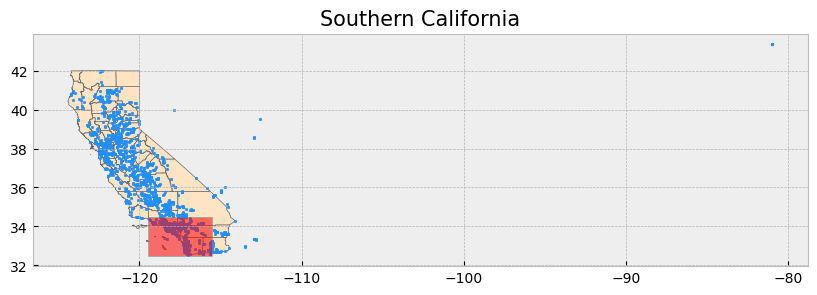

In [65]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
powerplants.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
poly.plot(ax = ax, color = 'red', edgecolor = 'lightseagreen', alpha = 0.55)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('California dataset', fontdict = {'fontsize': '15', 'fontweight' : '3'})

The power plant dataset has points outside the boundaries of California and for this reason the visualization includes a large portion of empty space. We will address this setting a x-axis limit and will exclude these data points later on in our analysis. 

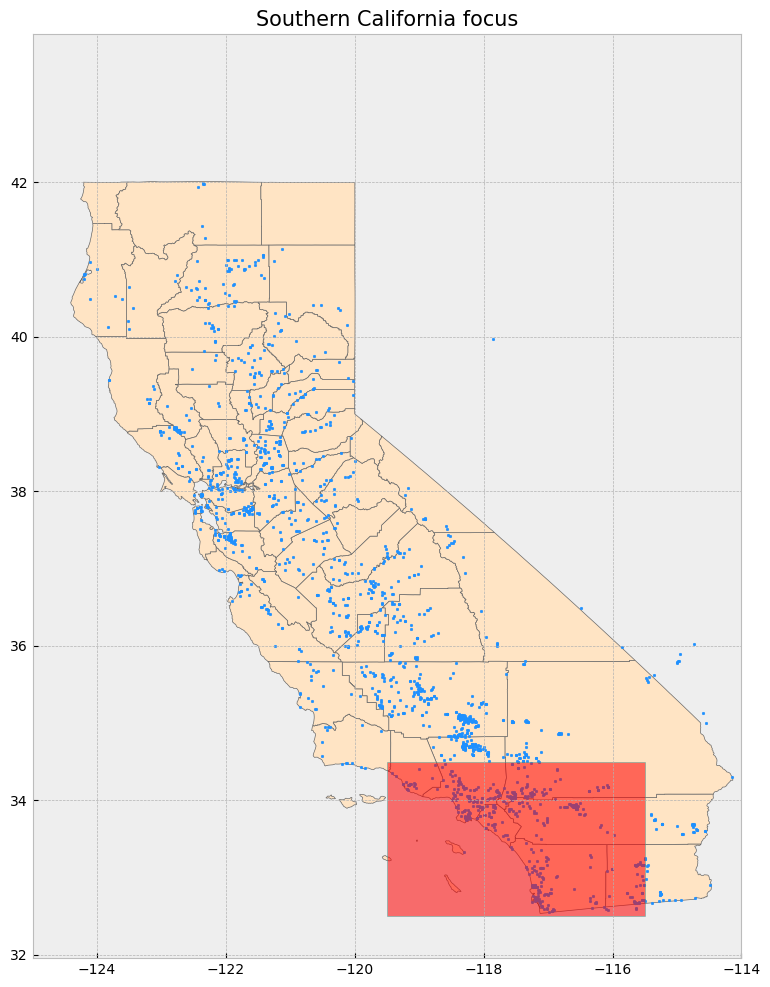

In [80]:
# Create subplots with larger size
fig, ax = plt.subplots(1, 1, figsize=(12, 12))  # Increased figure size

# Plot data
counties.plot(ax=ax, color='bisque', edgecolor='dimgray')  # Plot counties in light beige
powerplants.plot(ax=ax, marker='o', color='dodgerblue', markersize=3)  # Plot power plants
poly.plot(ax=ax, color='red', edgecolor='lightseagreen', alpha=0.55)  # Plot Southern California bounding box

# Constrain x-axis between -125 and -114 to exclude distant points
ax.set_xlim([-125, -114])

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('Southern California focus', fontdict={'fontsize': '15', 'fontweight': '3'})

# Show the plot
plt.show()

## Advanced spatial operations (clipping, intersection, union)

The clip function is one of the most used and needed functions as we often have datasets over a large area, but our focus region is just a portion of it. Clip extracts and keeps only the geometries of a vector feature that are within extent of another vector feature (think of it like a cookie-cutter or mask). We can use clip() in geopandas, with the first parameter being the vector that will be clipped and the second parameter being the vector that will define the extent of the clip. All attributes for the resulting clipped vector will be kept.

name  cartodb_id                created_at  \
15       San Diego          37 2015-07-04 21:04:58+00:00   
29        Imperial          13 2015-07-04 21:04:58+00:00   
49          Orange          30 2015-07-04 21:04:58+00:00   
52       Riverside          33 2015-07-04 21:04:58+00:00   
21     Los Angeles          19 2015-07-04 21:04:58+00:00   
40         Ventura          56 2015-07-04 21:04:58+00:00   
38   Santa Barbara          42 2015-07-04 21:04:58+00:00   
55  San Bernardino          36 2015-07-04 21:04:58+00:00   

                  updated_at  \
15 2015-07-04 21:04:58+00:00   
29 2015-07-04 21:04:58+00:00   
49 2015-07-04 21:04:58+00:00   
52 2015-07-04 21:04:58+00:00   
21 2015-07-04 21:04:58+00:00   
40 2015-07-04 21:04:58+00:00   
38 2015-07-04 21:04:58+00:00   
55 2015-07-04 21:04:58+00:00   

                                             geometry  
15  POLYGON ((-117.57848 33.45393, -117.55723 33.4...  
29  POLYGON ((-115.83884 33.42705, -115.71715 33.4...  
49  MULTIPOLYGON (((-118.08674 33.79609, -118.0846...  
52  POLYGON ((-117.66899 33.88092, -117.67279 33.8...  
21  MULTIPOLYGON (((-118.94080 34.07497, -118.7888...  
40  MULTIPOLYGON (((-119.47784 34.37942, -119.4518...  
38  MULTIPOLYGON (((-119.44227 34.45523, -119.4404...  
55  POLYGON ((-117.66002 34.50000, -115.50000 34.5...

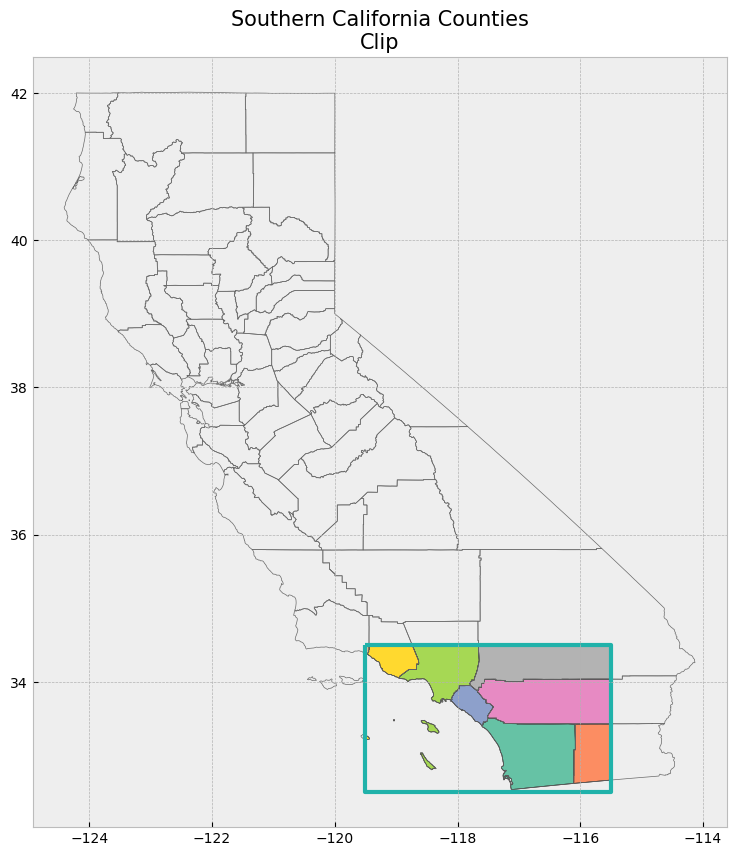

In [81]:
# Clip data
clip_counties = gpd.clip(counties, poly)

# Display attribute table
display(clip_counties)

# Plot clip
plot_df(result_name = "Southern California Counties\nClip", result_df = clip_counties, result_geom_type = "polygon", area = poly)

In [87]:
# Display attribute table
display(clip_powerplants.head(5))

CECPlantID                                  PlantName  Retired_Pl  \
1873      S0392  Innovative Cold Storage Enterprises (ICE)         0.0   
831       G0853                     Border - CalPeak Power         0.0   
830       G0819                        Larkspur Energy LLC         0.0   
829       G0785                    Otay Mesa Energy Center         0.0   
825       G1025                     Pio Pico Energy Center         0.0   

                          OperatorCo     County  Capacity_L  \
1873        San Diego Gas & Electric  San Diego         0.5   
831       CalPeak Power - Border LLC  San Diego        49.8   
830   Diamond Generating Corporation  San Diego        90.0   
829     Otay Mesa Energy Center, LLC  San Diego       689.0   
825      Pio Pico Energy Center, LLC  San Diego       336.0   

                          Units PriEnergyS   StartDate CEC_Jurisd  \
1873                          1        SUN  1899-12-30          0   
831                           2         NG  2001-10-26          1   
830        Larkspur1, Larkspur2         NG  2001-07-18          1   
829      OM1CT1, OM1CT2, OM1ST1         NG  2009-10-04          1   
825   Unit 1A, Unit 1B, Unit 1C         NG  2016-11-03          1   

                         geometry  
1873  POINT (-116.98287 32.54955)  
831   POINT (-116.94346 32.56247)  
830   POINT (-116.94422 32.56710)  
829   POINT (-116.91333 32.57356)  
825   POINT (-116.91783 32.57378)

CECPlantID                                  PlantName  Retired_Pl  \
1873      S0392  Innovative Cold Storage Enterprises (ICE)         0.0   
831       G0853                     Border - CalPeak Power         0.0   
830       G0819                        Larkspur Energy LLC         0.0   
829       G0785                    Otay Mesa Energy Center         0.0   
825       G1025                     Pio Pico Energy Center         0.0   
...         ...                                        ...         ...   
1335      S9281  Powhatan Solar Power Generation Station 1         0.0   
1296      G0930                    Bear Valley Power Plant         0.0   
1297      G1074   Big Bear Area Regional Wastewater Agency         0.0   
1337      S0328                   Lone Valley Solar Park 1         0.0   
1338      S0329                   Lone Valley Solar Park 2         0.0   

                                    OperatorCo          County  Capacity_L  \
1873                  San Diego Gas & Electric       San Diego         0.5   
831                 CalPeak Power - Border LLC       San Diego        49.8   
830             Diamond Generating Corporation       San Diego        90.0   
829               Otay Mesa Energy Center, LLC       San Diego       689.0   
825                Pio Pico Energy Center, LLC       San Diego       336.0   
...                                        ...             ...         ...   
1335         S-Power (Sustainable Power Group)  San Bernardino         1.5   
1296         Golden State Water Company (BVES)  San Bernardino         8.4   
1297  Big Bear Area Regional Wastewater Agency  San Bernardino         1.1   
1337          EDP Renewables North America LLC  San Bernardino        10.0   
1338          EDP Renewables North America LLC  San Bernardino        20.0   

                               Units PriEnergyS   StartDate CEC_Jurisd  \
1873                               1        SUN  1899-12-30          0   
831                                2         NG  2001-10-26          1   
830             Larkspur1, Larkspur2         NG  2001-07-18          1   
829           OM1CT1, OM1CT2, OM1ST1         NG  2009-10-04          1   
825        Unit 1A, Unit 1B, Unit 1C         NG  2016-11-03          1   
...                              ...        ...         ...        ...   
1335                          Unit 1        SUN  2013-12-01          0   
1296             1, 2, 3, 4, 5, 6, 7         NG  2005-01-01          0   
1297  Cummins 1, Cummins 2, Waukesha         NG  2003-07-15          0   
1337                               1        SUN  2014-10-01          0   
1338                               2        SUN  2014-10-01          0   

                         geometry  
1873  POINT (-116.98287 32.54955)  
831   POINT (-116.94346 32.56247)  
830   POINT (-116.94422 32.56710)  
829   POINT (-116.91333 32.57356)  
825   POINT (-116.91783 32.57378)  
...                           ...  
1335  POINT (-117.14413 34.49665)  
1296  POINT (-116.88530 34.24672)  
1297  POINT (-116.81554 34.27003)  
1337  POINT (-116.86585 34.39703)  
1338  POINT (-116.86249 34.40833)  

[542 rows x 11 columns]

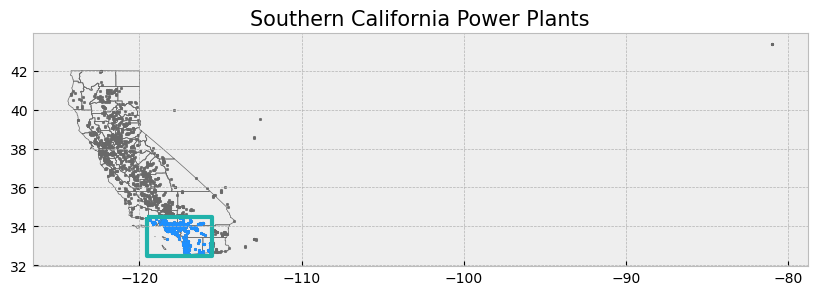

In [85]:
 # Clip data
clip_powerplants = gpd.clip(powerplants, poly)

# Display attribute table
display(clip_powerplants)

# Plot clip
plot_df(result_name = "Southern California Power Plants", result_df = clip_powerplants, result_geom_type = "point", area = poly)

## Select Location by Attributes

Selecting by attribute selects only the features in a dataset whose attribute values match the specified criteria. geopandas uses the indexing and selection methods in pandas, so data in a GeoDataFrame can be selected and queried in the same way a pandas dataframe can. 2, 3, 4

We will use use different criteria to subset the wells dataset.

In [88]:
# The criteria can use a variety of operators, including comparison and logical operators.

# Select power plants that are in a specific county
ventura_powerplants = clip_powerplants[(clip_powerplants["County"] == "Ventura")]

# Display first two and last two rows of attribute table
display_table(table_name = "Ventura County Power Plants", attribute_table = ventura_powerplants)

Attribute Table: Ventura County Power Plants

Table shape (rows, columns): (21, 11)

First two rows:


CECPlantID                          PlantName  Retired_Pl  \
1125      G0421    Ormond Beach Generating Station         0.0   
1124      E0211  Oxnard Wastewater Treatment Plant         0.0   

                              OperatorCo   County  Capacity_L  \
1125                 GenOn Holdings Inc.  Ventura      1612.8   
1124  City of Oxnard Wastewater Division  Ventura         1.5   

                 Units PriEnergyS   StartDate CEC_Jurisd  \
1125    UNIT 1, UNIT 2         NG  1971-08-03          0   
1124  7610, 7710, 7810        OBG  1981-08-01          0   

                         geometry  
1125  POINT (-119.16880 34.13016)  
1124  POINT (-119.18445 34.14132)


Last two rows:


CECPlantID                             PlantName  Retired_Pl  \
1311      G0643  Rincon Facility (Retired 12/31/2005)         1.0   
1313      H0533                         Santa Felicia         0.0   

                              OperatorCo   County  Capacity_L           Units  \
1311  Dos Cuadras Offshore Resources LLC  Ventura        3.00            GEN1   
1313  United Water Conservation District  Ventura        1.42  UNIT 1, UNIT 2   

     PriEnergyS   StartDate CEC_Jurisd                     geometry  
1311         NG  1992-03-01          0  POINT (-119.42280 34.35551)  
1313        WAT  1987-06-01          0  POINT (-118.75241 34.45956)

In [89]:
# Select power plants with higher capacity
hcapacity_powerplants = clip_powerplants[(clip_powerplants["Capacity_L"] > 1500)]

# Display first two and last two rows of attribute table
display_table(table_name = "High Capacity Power Plants in Southern California", attribute_table = hcapacity_powerplants)

Attribute Table: High Capacity Power Plants in Southern California

Table shape (rows, columns): (3, 11)

First two rows:


CECPlantID                                          PlantName  \
962       N0002  San Onofre Nuclear Generating Station -SONGS-R...   
1051      G0249                          Haynes Generating Station   

      Retired_Pl                                       OperatorCo  \
962          1.0                 Southern California Edison (SCE)   
1051         0.0  Los Angeles Department of Water & Power (LADWP)   

           County  Capacity_L  \
962     San Diego     2254.00   
1051  Los Angeles     1730.34   

                                                  Units PriEnergyS  \
962                                                2, 3        NUC   
1051  Unit #1, Unit #10, Unit #11, Unit #12, Unit #1...         NG   

       StartDate CEC_Jurisd                     geometry  
962   1968-01-01          0  POINT (-117.55484 33.36890)  
1051  1962-09-01          0  POINT (-118.09930 33.76482)


Last two rows:


CECPlantID                        PlantName  Retired_Pl  \
1051      G0249        Haynes Generating Station         0.0   
1125      G0421  Ormond Beach Generating Station         0.0   

                                           OperatorCo       County  \
1051  Los Angeles Department of Water & Power (LADWP)  Los Angeles   
1125                              GenOn Holdings Inc.      Ventura   

      Capacity_L                                              Units  \
1051     1730.34  Unit #1, Unit #10, Unit #11, Unit #12, Unit #1...   
1125     1612.80                                     UNIT 1, UNIT 2   

     PriEnergyS   StartDate CEC_Jurisd                     geometry  
1051         NG  1962-09-01          0  POINT (-118.09930 33.76482)  
1125         NG  1971-08-03          0  POINT (-119.16880 34.13016)

In [95]:
# Now let's try active high capacity plants in LA County

# Select power plants with higher capacity
LA_hcapacity_powerplants = clip_powerplants[(clip_powerplants["County"] == "Los Angeles") & (clip_powerplants["Capacity_L"] > 1500)& (clip_powerplants["Retired_Pl"]==0)]

# Display first two and last two rows of attribute table
display_table(table_name = "Active High Capacity Power Plants in LA County", attribute_table = LA_hcapacity_powerplants)

Attribute Table: Active High Capacity Power Plants in LA County

Table shape (rows, columns): (1, 11)

First two rows:


CECPlantID                  PlantName  Retired_Pl  \
1051      G0249  Haynes Generating Station         0.0   

                                           OperatorCo       County  \
1051  Los Angeles Department of Water & Power (LADWP)  Los Angeles   

      Capacity_L                                              Units  \
1051     1730.34  Unit #1, Unit #10, Unit #11, Unit #12, Unit #1...   

     PriEnergyS   StartDate CEC_Jurisd                     geometry  
1051         NG  1962-09-01          0  POINT (-118.09930 33.76482)


Last two rows:


CECPlantID                  PlantName  Retired_Pl  \
1051      G0249  Haynes Generating Station         0.0   

                                           OperatorCo       County  \
1051  Los Angeles Department of Water & Power (LADWP)  Los Angeles   

      Capacity_L                                              Units  \
1051     1730.34  Unit #1, Unit #10, Unit #11, Unit #12, Unit #1...   

     PriEnergyS   StartDate CEC_Jurisd                     geometry  
1051         NG  1962-09-01          0  POINT (-118.09930 33.76482)

# <u>V. Advanced Geospatial Operations</u>

# Working with GeoSeries in GeoPandas

A **GeoSeries** is a special kind of `pandas.Series` designed to hold geometries like points, polygons, or lines. These geometries are stored as **Shapely** objects. In this section, we will explore how to work with a `GeoSeries` and perform common operations like calculating areas, boundaries, centroids, and more.

GeoSeries also allow us to perform spatial operations, transformations, and plotting. Let's explore some useful GeoSeries methods using our Southern California dataset.


#### 1. Geometry Type and Bounds

GeoSeries objects contain geometries such as points, polygons, and linestrings. You can inspect the type of geometries and their bounding boxes using the `.geom_type` and `.bounds` attributes.


In [109]:
# You can find data from multiple regions online and don't even need to download the dataset
# This would be the same counties information, now we are using a different source to obtained
counties2 = gpd.read_file("https://raw.githubusercontent.com/codeforgermany/click_that_hood/master/public/data/california-counties.geojson")

# Get geometry type
print("Geometry Types of Counties:\n", counties2['geometry'].geom_type)

# Get bounds (minx, miny, maxx, maxy) of the geometries
print("Bounding boxes of counties:\n", counties2['geometry'].bounds)

Geometry Types of Counties:
 0     MultiPolygon
1          Polygon
2          Polygon
3          Polygon
4          Polygon
5          Polygon
6     MultiPolygon
7          Polygon
8          Polygon
9          Polygon
10         Polygon
11         Polygon
12         Polygon
13         Polygon
14         Polygon
15         Polygon
16    MultiPolygon
17         Polygon
18         Polygon
19    MultiPolygon
20         Polygon
21    MultiPolygon
22         Polygon
23    MultiPolygon
24         Polygon
25         Polygon
26         Polygon
27         Polygon
28         Polygon
29         Polygon
30         Polygon
31         Polygon
32         Polygon
33         Polygon
34         Polygon
35         Polygon
36         Polygon
37    MultiPolygon
38    MultiPolygon
39    MultiPolygon
40    MultiPolygon
41         Polygon
42         Polygon
43         Polygon
44         Polygon
45         Polygon
46         Polygon
47         Polygon
48         Polygon
49    MultiPolygon
50         Polygon
51

#### 2. Area and Centroid Calculation

You can easily calculate the area of polygons and find the centroid of geometries using GeoSeries. The `.area` attribute returns the area of each geometry, while `.centroid` calculates the centroid.

Nonetheless, the information needs to be projected to a CRS (i.e. UTM Zone 11N for California) rather than the geographic coordinates that we have been using.


In [111]:
counties_projected = counties2.to_crs(epsg=32611)  # UTM Zone 11N, which uses meters

# Step 2: Calculate area and centroid
counties_projected['area'] = counties_projected['geometry'].area
counties_projected['centroid'] = counties_projected['geometry'].centroid

# Step 3: Print the area and centroid of the counties
print("Area of counties (in square meters):\n", counties_projected[['name', 'area']])
print("Centroids of counties:\n", counties_projected[['name', 'centroid']])

# Optional: Reproject back to EPSG:4326 (if you need it in geographic coordinates afterward)
#counties2 = counties_projected.to_crs(epsg=4326)

Area of counties (in square meters):
                name          area
0           Alameda  1.931521e+09
1            Alpine  1.926213e+09
2            Amador  1.573764e+09
3             Butte  4.359077e+09
4         Calaveras  2.688184e+09
5            Colusa  3.008405e+09
6      Contra Costa  1.896421e+09
7         Del Norte  2.644022e+09
8          Tuolumne  5.896404e+09
9         El Dorado  4.634144e+09
10           Fresno  1.558098e+10
11            Glenn  3.451840e+09
12         Humboldt  9.358787e+09
13             Inyo  2.647062e+10
14             Lake  3.461404e+09
15        San Diego  1.096806e+10
16    San Francisco  1.221356e+08
17           Sierra  2.495846e+09
18         Siskiyou  1.651147e+10
19           Solano  2.201417e+09
20           Sonoma  4.140420e+09
21      Los Angeles  1.057461e+10
22           Madera  5.579997e+09
23            Marin  1.369511e+09
24         Mariposa  3.789820e+09
25        Mendocino  9.160656e+09
26           Merced  5.132826e+09
27        

#### 3. Plotting the GeoSeries

GeoPandas allows us to visualize GeoSeries with the `.plot()` function. Here, we plot the counties with their centroids.


/var/folders/xj/j6lmvj9j1ss00j7rl174g2j40000gr/T/ipykernel_78472/1516207456.py:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties.centroid.plot(ax=ax, color='red', marker='o', markersize=5)


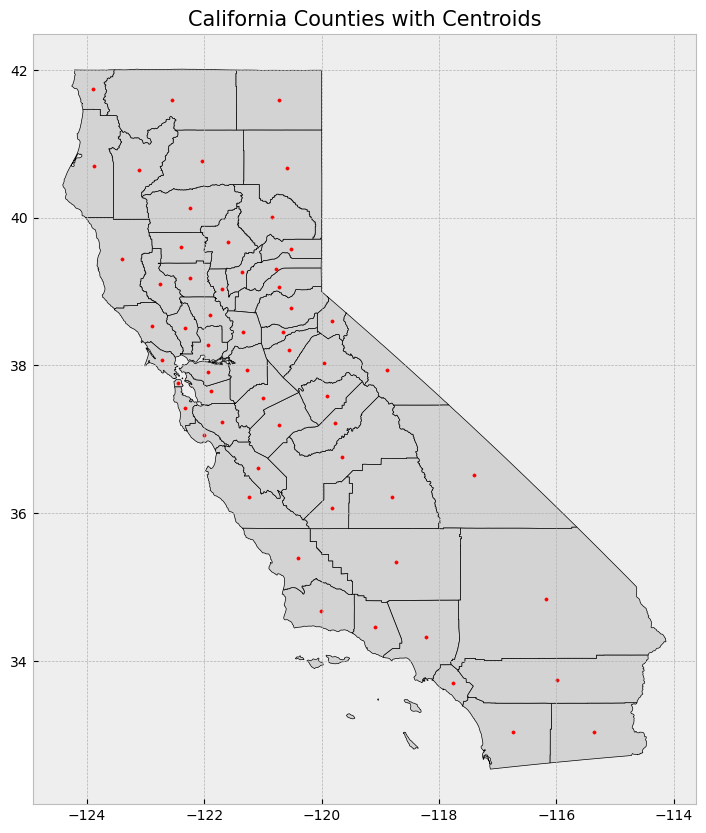

In [113]:
# Code for plotting GeoSeries
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
counties.plot(ax=ax, color='lightgray', edgecolor='black')

# Plot centroids
counties.centroid.plot(ax=ax, color='red', marker='o', markersize=5)

# Set title
ax.set_title("California Counties with Centroids", fontsize=15)
plt.show()

#### 4. Buffer and Boundary

You can create a buffer around geometries (useful for proximity analysis) using the `.buffer()` method, and find the boundary of polygons using `.boundary`.


/var/folders/xj/j6lmvj9j1ss00j7rl174g2j40000gr/T/ipykernel_78472/3549537906.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  counties['buffer'] = counties['geometry'].buffer(0.5)


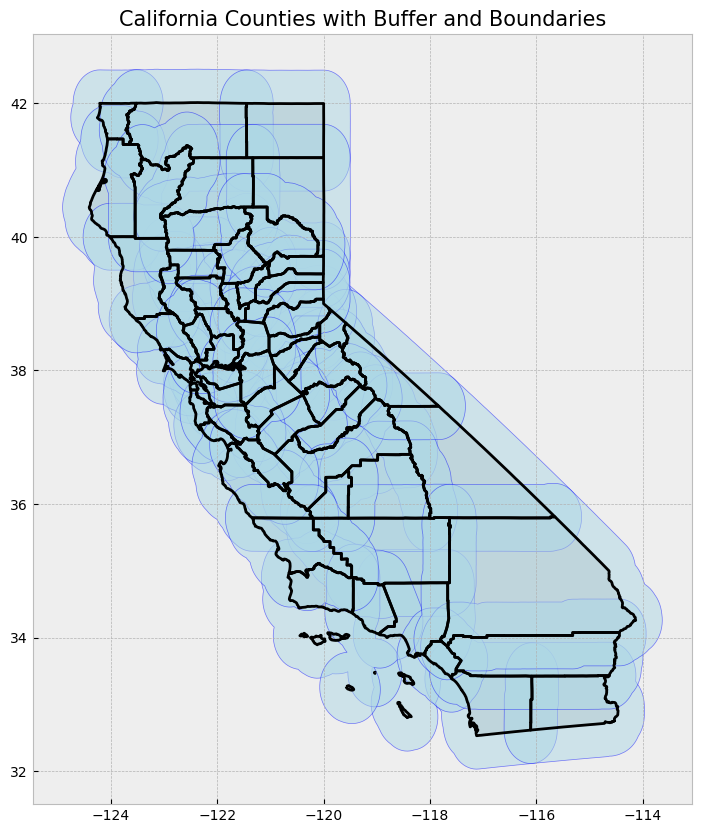

In [99]:
# Code for buffer and boundary
counties['buffer'] = counties['geometry'].buffer(0.5)

# Plot buffer and boundaries
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
counties.plot(ax=ax, color='lightgray', edgecolor='black')
counties['buffer'].plot(ax=ax, color='lightblue', alpha=0.5, edgecolor='blue')

counties.boundary.plot(ax=ax, color='black')
ax.set_title("California Counties with Buffer and Boundaries", fontsize=15)
plt.show()


#### 5. Spatial Operations: Intersection and Filtering Power Plants, select location by distance

In this section, we will find all power plants located in Los Angeles County that are within 15 miles of the county's centroid. After that, we'll filter these power plants to include only those with a capacity greater than 500 MW.

LA County centroid: POINT (387336.3566857098 3798554.268262513)


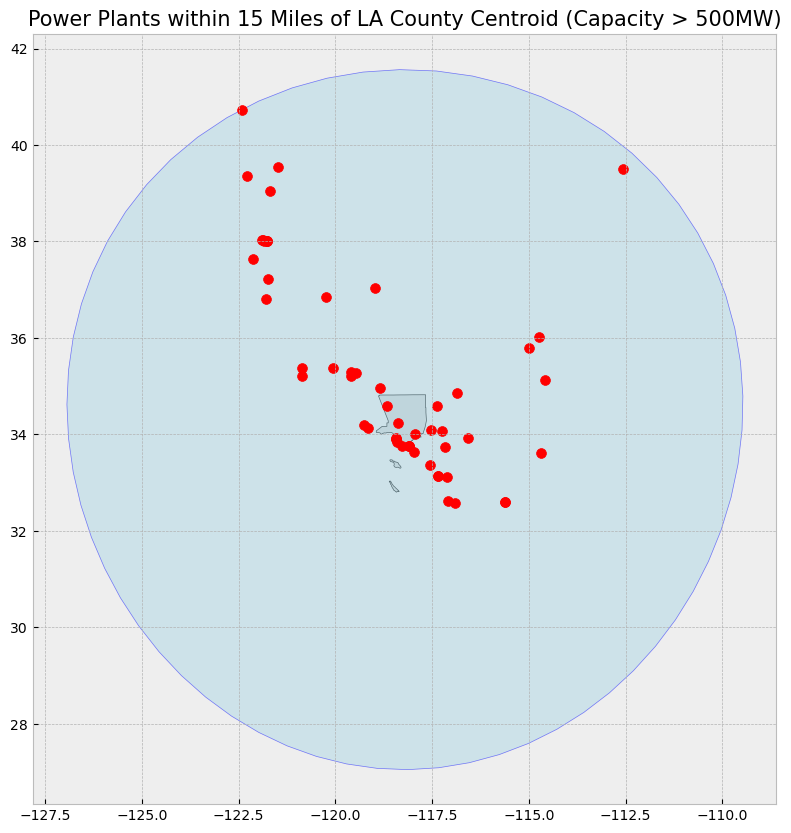

PlantName  Capacity_L
84                             Moss Landing Power Plant     1080.00
138                              Helms (Pumped Storage)     1212.00
142                               Metcalf Energy Center      565.80
262                          Russell City Energy Center      640.00
382                          Gateway Generating Station      613.10
383                    Marsh Landing Generating Station      828.00
384   Pittsburg Generating Station (Retired 12/31/2016)     2022.00
392         Contra Costa Power Plant - Retired May 2013      680.00
395                           Los Medanos Energy Center      594.00
396                                 Delta Energy Center      860.20
601                                Sutter Energy Center      551.80
640                           Colusa Generating Station      692.00
659      Edward C Hyatt (Unit 1,3,5 Pumping-Generating)      644.25
671                    Intermountain Power Project (UT)     1800.00
744                                              Shasta      714.00
802                      CAISO In-State Wind Generation     5664.00
816       South Bay Power Plant - Retired December 2010      709.00
829                             Otay Mesa Energy Center      689.00
838   Termoelectrica de Mexicali (TDM  Mexicali  Mex...      680.85
839              La Rosita (INTERGEN  Mexicali  Mexico)     1353.00
905           Encina Power Station (retired 12/11/2018)      965.00
906                              Carlsbad Energy Center      525.00
914                               Palomar Energy Center      559.00
962   San Onofre Nuclear Generating Station -SONGS-R...     2254.00
968                     Huntington Beach Energy Project      696.00
979    Inland Empire Energy Center (Retired 12/31/2019)      810.00
1004                              Blythe Energy Project      537.00
1006                           El Segundo Energy Center      526.00
1008      El Segundo Power Station - Retired 12/31/2015     1020.00
1009                            Redondo Beach LLC_(AES)     1354.77
1010                                        Scattergood      876.02
1028                                             Harbor      836.00
1035                             Alamitos Energy Center      693.00
1049                                           Alamitos     1135.27
1051                          Haynes Generating Station     1730.34
1093                             Sentinel Energy Center      800.00
1125                    Ormond Beach Generating Station     1612.80
1161                           Walnut Creek Energy Park      500.50
1214     Etiwanda Generating Station (Retired 6/1/2018)     1049.09
1238                    Mountainview Generating Station     1110.00
1259     Mandalay Generating Station (Retired 2/6/2018)      573.33
1280                          Valley Generating Station      681.96
1341                           Castaic (Pumped Storage)     1331.00
1459                          High Desert Power Project      854.90
1492   Coolwater Generating Station (Retired 1/15/2015)      726.66
1510                           Pastoria Energy Facility      778.00
1588                                      Diablo Canyon     2323.00
1601                               La Paloma Generating     1200.00
1602                                      Sunrise Power      572.00
1603                               Elk Hills Power  LLC      567.00
1637  Mohave Generating Station (Nevada) - Retired D...     1636.20
1639        Morro Bay Power Plant (Retired Feb 05 2014)      912.00
1641                              Topaz Solar Farms LLC      550.00
1745                     Desert Star Energy Center (NV)      536.00
1768                                    Hoover Dam (NV)     2080.00

In [103]:
# Reproject data to NAD83(HARN) / California Zone 3 (EPSG:4326)
proj = 4326
counties = counties.to_crs(epsg=proj)
powerplants = powerplants.to_crs(epsg=proj)

# Step 1: Filter for Los Angeles County
la_county = counties[counties['name'] == "Los Angeles"]

# Step 2: Find centroid of LA County (in a projected CRS)
la_county = la_county.to_crs(epsg=32611)  # Project to UTM Zone 11N for accurate distance calculation
la_centroid = la_county.centroid.iloc[0]  # Get the centroid as a Shapely point
print(f"LA County centroid: {la_centroid}")

# Step 3: Create a buffer of 500 miles around the centroid (~24.14 kilometers)
buffer_distance_miles = 500 * 1609.34  # Convert 500 miles to meters
la_buffer = la_centroid.buffer(buffer_distance_miles)

# Assign the same CRS to the buffer
la_buffer = gpd.GeoSeries([la_buffer], crs=la_county.crs)

# Step 4: Filter power plants within the 15-mile buffer of LA County centroid
powerplants_projected = powerplants.to_crs(epsg=32611)  # Project power plants for spatial operations
powerplants_in_buffer = powerplants_projected[powerplants_projected.geometry.within(la_buffer.iloc[0])]

# Step 5: Further filter for power plants with capacity greater than 500 MW
powerplants_filtered = powerplants_in_buffer[powerplants_in_buffer['Capacity_L'] > 500]

# Reproject everything back to EPSG:4326 for consistent plotting
powerplants_filtered = powerplants_filtered.to_crs(epsg=proj)
la_county = la_county.to_crs(epsg=proj)
la_buffer = la_buffer.to_crs(epsg=proj)

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot LA County and the 15-mile buffer
la_county.plot(ax=ax, color="lightgray", edgecolor="black")
gpd.GeoSeries(la_buffer).plot(ax=ax, color="lightblue", alpha=0.5, edgecolor="blue")

# Plot the filtered power plants
powerplants_filtered.plot(ax=ax, color="red", marker='o', markersize=50)

# Set plot title
ax.set_title("Power Plants within 500 Miles of LA County Centroid (Capacity > 500MW)", fontsize=15)

plt.show()

# Display the filtered power plants
powerplants_filtered[['PlantName', 'Capacity_L']]

In [46]:

# Reproject data to NAD83(HARN) / California Zone 3 (EPSG:4326)
proj = 4326
counties = counties.to_crs(epsg=proj)
powerplants = powerplants.to_crs(epsg=proj)

# Step 1: Filter for Los Angeles County
la_county = counties[counties['name'] == "Los Angeles"]

# Step 2: Find centroid of LA County (in a projected CRS)
la_county = la_county.to_crs(epsg=32611)  # Project to UTM Zone 11N for accurate distance calculation
la_centroid = la_county.centroid.iloc[0]  # Get the centroid as a Shapely point
print(f"LA County centroid: {la_centroid}")

# Step 3: Create buffers for 150 miles and 700 miles around the centroid (~24.14 km and ~1126.54 km)
buffer_distance_15_miles = 150 * 1609.34  # 150 miles to meters
buffer_distance_700_miles = 700 * 1609.34  # 700 miles to meters
la_buffer_15 = la_centroid.buffer(buffer_distance_15_miles)
la_buffer_700 = la_centroid.buffer(buffer_distance_700_miles)

# Assign the same CRS to the buffers
la_buffer_15 = gpd.GeoSeries([la_buffer_15], crs=la_county.crs)
la_buffer_700 = gpd.GeoSeries([la_buffer_700], crs=la_county.crs)

# Step 4: Simplify county geometries to avoid topology conflicts
# Simplifying with a tolerance (higher tolerance simplifies more)
counties_in_700_miles = counties.to_crs(epsg=32611)
counties_in_700_miles['geometry'] = counties_in_700_miles['geometry'].simplify(tolerance=500)

# Find counties that intersect with the 700-mile buffer
counties_within_700_miles = counties_in_700_miles[counties_in_700_miles.intersects(la_buffer_700.iloc[0])]

# Step 5: Filter power plants within the 15-mile buffer of LA County centroid
powerplants_projected = powerplants.to_crs(epsg=32611)  # Project power plants for spatial operations
powerplants_in_buffer = powerplants_projected[powerplants_projected.geometry.within(la_buffer_15.iloc[0])]

# Step 6: Further filter for power plants with capacity greater than 500 MW
powerplants_filtered = powerplants_in_buffer[powerplants_in_buffer['Capacity_L'] > 500]

# Reproject everything back to EPSG:4326 for consistent plotting
powerplants_filtered = powerplants_filtered.to_crs(epsg=proj)
counties_within_700_miles = counties_within_700_miles.to_crs(epsg=proj)
la_buffer_15 = la_buffer_15.to_crs(epsg=proj)
la_buffer_700 = la_buffer_700.to_crs(epsg=proj)

# Plotting the results
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot counties within 700 miles for reference
counties_within_700_miles.plot(ax=ax, color="lightgray", edgecolor="black")

# Plot LA County 15-mile buffer
gpd.GeoSeries(la_buffer_15).plot(ax=ax, color="lightblue", alpha=0.5, edgecolor="blue")

# Plot the filtered power plants
powerplants_filtered.plot(ax=ax, color="red", marker='o', markersize=50)

# Set plot title
ax.set_title("Power Plants within 150 Miles of LA County Centroid (Capacity > 500MW) \n with Counties within 700 Miles", fontsize=15)

plt.show()

# Display the filtered power plants
powerplants_filtered[['PlantName', 'Capacity_L']]

KeyError: 'name'

# Select location operations with GeoDataFrame

If we’re trying to select features that have a specified spatial relationship with another geopandas object, it gets a little tricky. This is because the geopandas spatial relationship functions verify the spatial relationship either row by row or index by index. In other words, the first row in the first dataset will be compared with the corresponding row or index in the second dataset, the second row in the first dataset will be compared with the corresponding row or index in the second dataset

As a result, the number of rows need to correspond or the indices numbers need to match between the two datasets–or else we’ll get a warning and the output will be empty.

Because each record in a GeoDataFrame has a geometry column that stores that record’s geometry as a shapely object, we can call this object if we want to check a bunch of features against one extent (with one geometry)

Attribute Table: Southern California Power Plants within Los Angeles County

Table shape (rows, columns): (260, 11)

First two rows:


CECPlantID        PlantName  Retired_Pl                        OperatorCo  \
797      S0674  CREST Contracts         0.0                     Not Available   
927      G0014     Pebbly Beach         0.0  Southern California Edison (SCE)   

          County  Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  \
797  Los Angeles         4.0  Unit 1        SUN  2016-03-16          0   
927  Los Angeles        11.1  Unit 1        DFO  1995-12-01          0   

                        geometry  
797  POINT (-118.25939 34.04930)  
927  POINT (-118.31029 33.33353)


Last two rows:


CECPlantID PlantName  Retired_Pl OperatorCo       County  Capacity_L  \
1976      S0761      None         0.0       None  Los Angeles         3.0   
1977      S0764      None         0.0       None  Los Angeles         3.0   

       Units PriEnergyS   StartDate CEC_Jurisd                     geometry  
1976  Unit 1        SUN  1899-12-30       None  POINT (-118.14452 34.69748)  
1977  Unit 1        SUN  1899-12-30       None  POINT (-118.14451 34.69742)

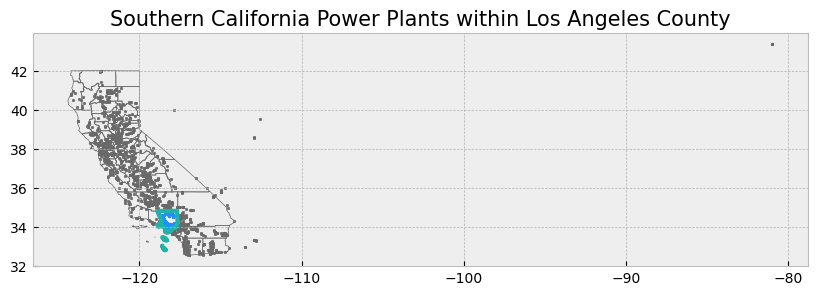

In [115]:
# Select theCounty boundary
la_county = counties[counties["name"] == "Los Angeles"]

# Subset the GeoDataFrame by checking which wells are within Santa Clara County's Shapely object
powerplants_within_la_shapely = powerplants[powerplants.within(la_county.geometry.values[0])]

# Display first two and last two rows of attribute table
display_table(table_name = "Southern California Power Plants within Los Angeles County", attribute_table = powerplants_within_la_shapely)

# Plot selection
plot_df(result_name = "Southern California Power Plants within Los Angeles County", result_df = powerplants_within_la_shapely, result_geom_type = "point", area = la_county)

#### Visualization: Southern California Power Plants within Los Angeles County

This visualization shows the power plants located within Los Angeles County. The plot focuses on the LA county area only constrained between the longitudes of -119 and -117, removing distant points for clarity. The points represent the locations of the power plants, while the boundaries of Los Angeles County are shown for reference.


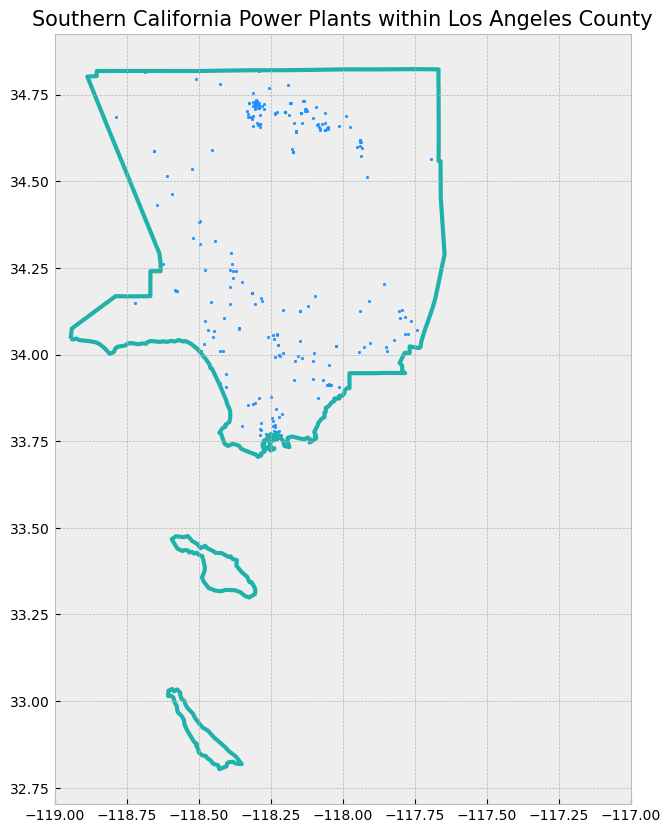

In [117]:
def plot_df(result_name, result_df, result_geom_type, area=None, xlim=None):
    '''Plot the result on a map, add the outlines of the original shapefiles, and constrain x-axis.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))

    # Plot data depending on vector type
    # For points
    if result_geom_type == "point":
        # Plot data
        area.plot(ax=ax, color='none', edgecolor='dimgray')  # Plot LA County outline
        result_df.plot(ax=ax, marker='o', color='dodgerblue', markersize=3)  # Plot power plants as points

    # For polygons
    else:
        # Plot overlay data
        result_df.plot(ax=ax, cmap='Set2', edgecolor='black')  # Plot result polygons
        
        # Plot outlines of original shapefiles
        if area is not None:
            area.plot(ax=ax, color='none', edgecolor='dimgray')

    # Add additional outlined boundary if specified
    if area is not None:
        area.plot(ax=ax, color='none', edgecolor='lightseagreen', linewidth=3)

    # Else, pass
    else:
        pass

    # Stylize plots
    plt.style.use('bmh')

    # Set xlim if provided
    if xlim:
        ax.set_xlim(xlim)

    # Set title
    ax.set_title(result_name, fontdict={'fontsize': '15', 'fontweight': '3'})

    # Show the plot
    plt.show()

# Example usage:
plot_df(result_name="Southern California Power Plants within Los Angeles County",
        result_df=powerplants_within_la_shapely, result_geom_type="point", area=la_county, xlim=[-119, -117])

# Spatial Overlays and Spatial joins

In this section, we'll prepare our data for analysis. We will load two spatial datasets for California:
1. **County Boundaries**: This dataset contains the boundaries of all counties in California.
2. [**Lakes by Watershed**](https://gis.data.ca.gov/datasets/a35483a884e14f07a8baac832ad25798_0/explore?location=37.126691%2C-119.318560%2C6.96): This map represents adopted TMDL project areas for the Central Coast region. The source of spatial data representing TMDL project areas varies by TMDL project, but typically includes one or more of the following sources: United States Geologic Survey’s (USGS) Waterbody Boundary Dataset (WBD), CalWater2.2, and special studies conducted by Santa Barbara County Flood Control, Elkhorn Slough National Estuarine Research Reserve, and California State University, Monterey. The source of TMDL project area spatial data is typically referenced in the TMDL report associated with each TMDL project.
3. **Powerplants**: This dataset was used in our previous section

We will use the `geopandas` library to load these GeoJSON files and perform spatial operations later.

For watersheds, we can use a publicly available dataset from California's Natural Resources Agency, which includes watersheds for the entire state.



In [4]:
counties3 = gpd.read_file("/Users/jc/Downloads/California_Counties/California_Counties.shp")

In [5]:
# Load California watershed boundaries 
watersheds = gpd.read_file("/Users/jc/Downloads/Lakes_by_Watershed/Lakes_by_Watershed.shp")

# Display the first two rows of the watersheds data
watersheds.head(2)

# https://spatialreference.org/ref/epsg/4326/
proj = 4326
counties = counties.to_crs(proj)
watersheds = watersheds.to_crs(proj)
powerplants = powerplants.to_crs(proj)

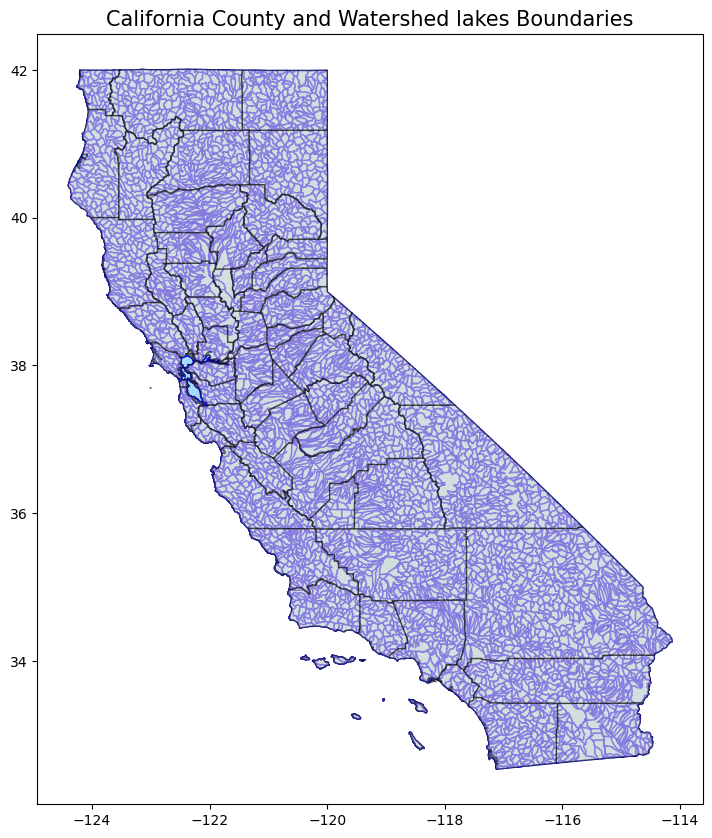

In [15]:
# Plot counties and watersheds
fig, ax = plt.subplots(1, 1, figsize=(12, 10))


# Plot watersheds lakes
watersheds.plot(ax=ax, color='lightskyblue', edgecolor='blue', alpha=0.75)

# Plot counties
counties.plot(ax=ax, color='bisque', edgecolor='black', alpha=0.50)

# Set title
ax.set_title('California County and Watershed lakes Boundaries', fontsize=15)

plt.show()


In [7]:
# Functions to make displaying and mapping our results a bit easier

def display_table(table_name, attribute_table):
    '''Display the first and last two rows of attribute table.'''

    # Print title
    print("Attribute Table: {}".format(table_name))

    # Print number of rows and columns
    print("\nTable shape (rows, columns): {}".format(attribute_table.shape))

    # Display first two rows of attribute table
    print("\nFirst two rows:")
    display(attribute_table.head(2))

    # Display last two rows of attribute table
    print("\nLast two rows:")
    display(attribute_table.tail(2))


def plot_overlay(overlay_type, overlay_result):
    '''Plot the overlay result on a map and add the outlines of the original shapefiles on top.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot overlay data
    overlay_result.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

    # Plot outlines of original shapefiles
    counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
    watersheds.plot(ax = ax, color = 'none', edgecolor = 'dodgerblue')

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title('California Counties and Watershed Lake Boundaries\n{}'.format(overlay_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})


def plot_merge(merge_type, merge_result, merge_vector):
    '''Plot the merge result on a map.'''

    # Create subplots
    fig, ax = plt.subplots(1, 1, figsize = (10, 10))

    # Plot data depending on vector type
    # For points
    if merge_vector == "point":

        # Plot data
        counties.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
        merge_result.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

    # For polygons
    else:

        # Plot data
        merge_result.plot(ax = ax, cmap = 'Set2', edgecolor = 'black')

    # Stylize plots
    plt.style.use('bmh')

    # Set title
    ax.set_title('California Counties and Watershed and Power Plants Locations\n{}'.format(merge_type), fontdict = {'fontsize': '15', 'fontweight' : '3'})

### Overlays


For the first four, we can use the overlay function in geopandas. We simply change the argument for the how parameter to the overlay of our choosing.

We will use the county boundaries and watershed lakes boundaries shapefiles in these examples. The overlays will allow us to see what areas are only in a county, only in a watershed, or in both. Because there are no areas unique to one dataset, notice how the attribute table of the combined dataset does not have any NaN values. When mapping the intersection overlay, we can see that any areas that did not have any overlay were discarded (areas with an outline but no fill). Areas covered by the county and watershed boundaries datasets are kept (shown in color).

[Source](https://pygis.io/docs/e_vector_overlay.html)

| Spatial Relationship | Description |
|----------------------|-------------|
| contains             | Geometry’s points are not to the exterior of the other geometry, provided that the geometry’s interior contains at least one point of the other geometry’s interior. |
| crosses              | Geometry’s interior intersects that of the other geometry, provided that the geometry does not contain the other, and the dimension of the intersection is less than the dimension of either geometry. |
| intersects           | Geometry’s boundary or interior touches or crosses any part of the other geometry. |
| overlaps             | Geometry shares at least one point, but not all points, with the other geometry, provided that the geometries and the intersection of their interiors all have the same dimensions. |
| touches              | Geometry shares at least one point with the other geometry, provided that no part of the geometry’s interior intersects with the other geometry. |
| within               | Geometry is enclosed in the other geometry (geometry’s boundary and interior intersects with the other geometry’s interior only). |


In [8]:
# Get intersection
intersection_result = gpd.overlay(counties, watersheds, how = 'intersection')

# Print head and tail of attribute table
display_table(table_name = "intersection", attribute_table = intersection_result)

Attribute Table: intersection

Table shape (rows, columns): (5872, 16)

First two rows:


OBJECTID_1                 NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
0           1       Alameda County  California         06       001  06001   
1           7  Contra Costa County  California         06       013  06013   

   Shape__Are_1   Shape__Len_1  OBJECTID_2         HUC12  \
0  3.084661e+09  448425.775672         106  180500021001   
1  3.075717e+09  451548.843199         106  180500021001   

                                       Name  Lakes Lakes_data  Shape__Are_2  \
0  Angel Island-San Francisco Bay Estuaries      1  CA_Lakes;  9.914524e+07   
1  Angel Island-San Francisco Bay Estuaries      1  CA_Lakes;  9.914524e+07   

    Shape__Len_2                                           geometry  
0  406713.908653  MULTIPOLYGON (((-122.33652 37.80916, -122.3363...  
1  406713.908653  MULTIPOLYGON (((-122.30438 37.89828, -122.3044...


Last two rows:


OBJECTID_1         NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
5870          58  Yuba County  California         06       115  06115   
5871          58  Yuba County  California         06       115  06115   

      Shape__Are_1  Shape__Len_1  OBJECTID_2         HUC12  \
5870  2.786709e+09  362944.77263        4066  180201590501   
5871  2.786709e+09  362944.77263        4116  180201250405   

                                      Name  Lakes Lakes_data  Shape__Are_2  \
5870                           Jack Slough      1  CA_Lakes;  2.232749e+08   
5871  Little Oregon Creek-North Yuba River      1  CA_Lakes;  7.705886e+07   

      Shape__Len_2                                           geometry  
5870  78540.909282  POLYGON ((-121.43074 39.26946, -121.43064 39.2...  
5871  45877.599407  POLYGON ((-121.12929 39.42403, -121.12898 39.4...

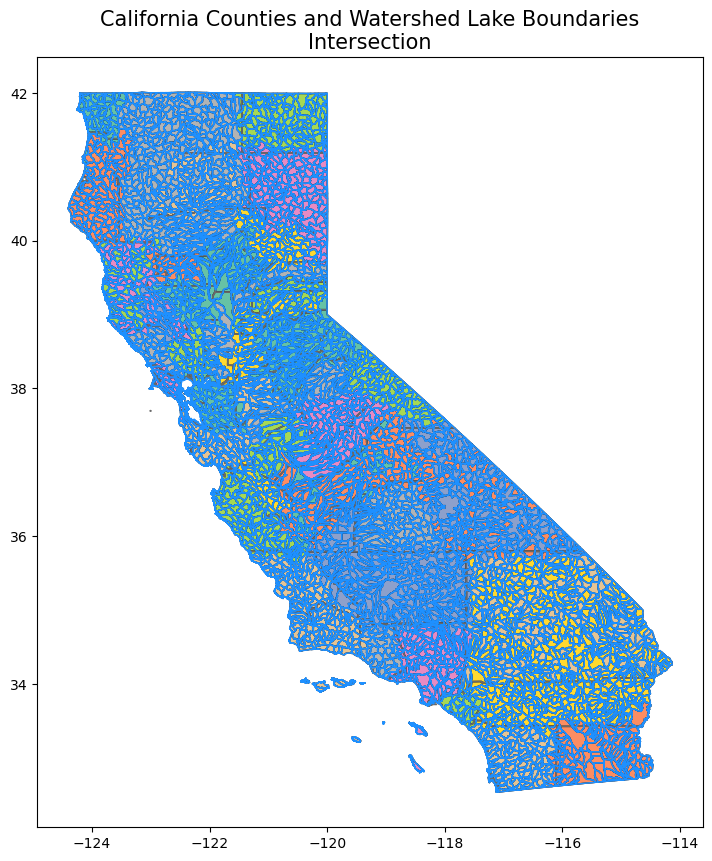

In [11]:
# Plot overlay
plot_overlay(overlay_type = "Intersection", overlay_result = intersection_result)


Looking at the attribute table, the fields from the second dataset do not appear in the combined dataset. The second dataset was “combined” with the first dataset by discarding some data (altering the geometry) from the first dataset.

Looking at the map, we only see areas of the first dataset (county dataset) that are not covered by the second dataset (watershed boundaries dataset).

Attribute Table: Difference

Table shape (rows, columns): (58, 9)

First two rows:


OBJECTID            NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
0         1  Alameda County  California         06       001  06001   
1         2   Alpine County  California         06       003  06003   

     Shape__Are     Shape__Len  \
0  3.084661e+09  448425.775672   
1  3.156006e+09  275565.131463   

                                            geometry  
0  MULTIPOLYGON (((-122.19225 37.69287, -122.1926...  
1  POLYGON ((-119.88726 38.92149, -119.87602 38.9...


Last two rows:


OBJECTID         NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
56        57  Yolo County  California         06       113  06113   
57        58  Yuba County  California         06       115  06115   

      Shape__Are     Shape__Len  \
56  4.357431e+09  417348.649671   
57  2.786709e+09  362944.772630   

                                             geometry  
56  POLYGON ((-121.98899 38.92550, -121.98746 38.9...  
57  POLYGON ((-121.02826 39.55778, -121.02852 39.5...

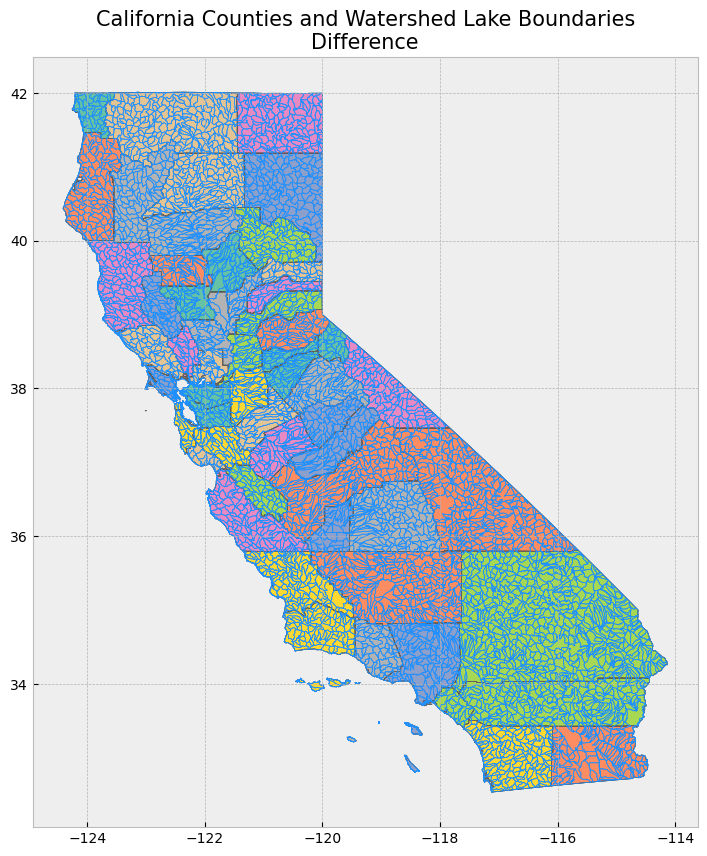

In [14]:
# Get difference
difference_result = gpd.overlay(counties, powerplants, how = 'difference')

# Print head and tail of attribute table
display_table(table_name = "Difference", attribute_table = difference_result)

# Plot overlay
plot_overlay(overlay_type = "Difference", overlay_result = difference_result)

## Spatial Join

With spatial join, attributes from one dataset are appended to those in another dataset based on a specified relative spatial relationship. 3, 4

In geopandas, we use the sjoin() function. In addition to passing the datasets as arguments, and we also pass arguments for two parameters op and how. The op parameter specifies the spatial relationship needed in order for the attributes of one feature to be joined to another.
Similar regular table joins, there are multiple types of spatial joins, which determine which features from both datasets are kept in the output dataset. This is specified using the how parameter.

| Join Type | Description |
|-----------|-------------|
| left      | All features from the first or left dataset are kept, regardless if the feature met the specified spatial relationship criteria for a join, or if there is a match. |
| right     | All features from the second or right dataset are kept, regardless if the feature met the specified spatial relationship for a join. |
| inner     | Only features from both datasets that met the spatial relationship and were joined are kept; the geometries from the first or left dataset are used for the join. |


Attribute Table: California and Surrounding Area Power Plants

Table shape (rows, columns): (1996, 11)

First two rows:


CECPlantID                 PlantName  Retired_Pl        OperatorCo County  \
0      S0335  Corcoran 2 Solar LLC CED         0.0  RWE Clean Energy  Kings   
1      S0520          Corcoran 3 Solar         0.0  RWE Clean Energy  Kings   

   Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  \
0        19.8       1        SUN  2015-06-10          0   
1        20.0  Unit 1        SUN  2016-02-11          0   

                      geometry  
0  POINT (-119.56789 36.13717)  
1  POINT (-119.57971 36.14432)


Last two rows:


CECPlantID              PlantName  Retired_Pl  OperatorCo County  \
1994      W0486   Wind Wall Monolith I         0.0  Eolus Vind   Kern   
1995      W0487  Wind Wall Monolith II         0.0  Eolus Vind   Kern   

      Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  \
1994       19.85  WPRS 1        WND  1899-12-30          0   
1995       23.66  WPRS 1        WND  1899-12-30          0   

                         geometry  
1994  POINT (-118.43540 35.14036)  
1995  POINT (-118.43280 35.13992)

Text(0.5, 1.0, 'California and Surrounding Area Power Plants')

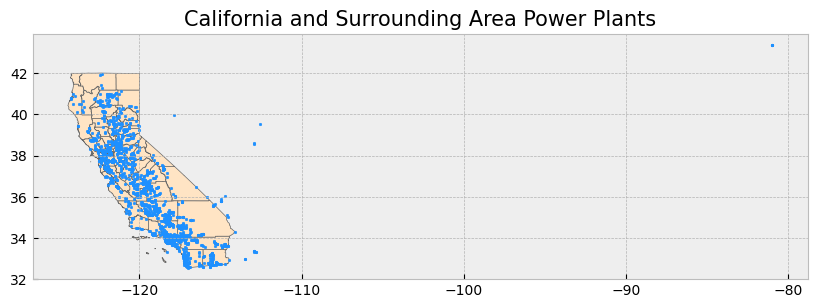

In [19]:
# Print head and tail of attribute table
display_table(table_name = "California and Surrounding Area Power Plants", attribute_table = powerplants)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
powerplants.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)

# Stylize plots
plt.style.use('bmh')

# Set title
ax.set_title('California and Surrounding Area Power Plants', fontdict = {'fontsize': '15', 'fontweight' : '3'})

We’ll first demonstrate a left join. Notice that all features from the left dataset (power plants dataset) are kept. The features that did not meet the spatial relationship criteria for a join have NaN as values for the fields that originated from the right dataset (county boundaries dataset).

Attribute Table: Left Join

Table shape (rows, columns): (1996, 20)

First two rows:


CECPlantID                 PlantName  Retired_Pl        OperatorCo County  \
0      S0335  Corcoran 2 Solar LLC CED         0.0  RWE Clean Energy  Kings   
1      S0520          Corcoran 3 Solar         0.0  RWE Clean Energy  Kings   

   Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  \
0        19.8       1        SUN  2015-06-10          0   
1        20.0  Unit 1        SUN  2016-02-11          0   

                      geometry  index_right  OBJECTID          NAME  \
0  POINT (-119.56789 36.13717)         15.0      16.0  Kings County   
1  POINT (-119.57971 36.14432)         15.0      16.0  Kings County   

   STATE_NAME STATE_FIPS CNTY_FIPS   FIPS    Shape__Are     Shape__Len  
0  California         06       031  06031  5.531189e+09  354592.625713  
1  California         06       031  06031  5.531189e+09  354592.625713


Last two rows:


CECPlantID              PlantName  Retired_Pl  OperatorCo County  \
1994      W0486   Wind Wall Monolith I         0.0  Eolus Vind   Kern   
1995      W0487  Wind Wall Monolith II         0.0  Eolus Vind   Kern   

      Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  \
1994       19.85  WPRS 1        WND  1899-12-30          0   
1995       23.66  WPRS 1        WND  1899-12-30          0   

                         geometry  index_right  OBJECTID         NAME  \
1994  POINT (-118.43540 35.14036)         14.0      15.0  Kern County   
1995  POINT (-118.43280 35.13992)         14.0      15.0  Kern County   

      STATE_NAME STATE_FIPS CNTY_FIPS   FIPS    Shape__Are     Shape__Len  
1994  California         06       029  06029  3.185412e+10  861861.103637  
1995  California         06       029  06029  3.185412e+10  861861.103637

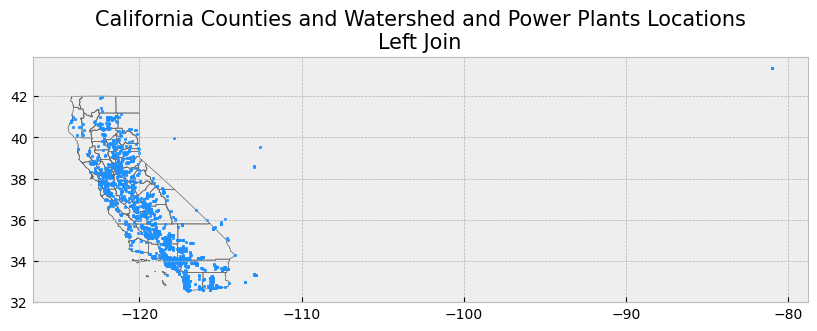

In [21]:
# Get inner join
left_join_result = gpd.sjoin(powerplants, counties, how = "left", predicate = 'within')

# Print head and tail of attribute table
display_table(table_name = "Left Join", attribute_table = left_join_result)

# Plot merge
plot_merge(merge_type = "Left Join", merge_result = left_join_result, merge_vector = "point")

For a right join, all features from the right dataset (county boundaries dataset) are kept but are repeated multiple times. This is because a “new” county feature is created for every power plant point that falls within a county’s boundary. As a result, because wells must fall within the county boundaries for a join to occur on the county boundaries feature, there are no resulting features with NaN as values in the attribute table.

Attribute Table: Right Join

Table shape (rows, columns): (1967, 20)

First two rows:


index_left CECPlantID            PlantName  Retired_Pl         OperatorCo  \
0       279.0      S0619  Whitehorn Solar LLC         0.0     REV Renewables   
0       278.0      S0220           RE Mohican         0.0  Kaiser Permanente   

    County  Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  OBJECTID  \
0  Alameda         3.3  Unit 1        SUN  2016-02-18          0         1   
0  Alameda         1.0       1        SUN  2010-09-01          0         1   

             NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS    Shape__Are  \
0  Alameda County  California         06       001  06001  3.084661e+09   
0  Alameda County  California         06       001  06001  3.084661e+09   

      Shape__Len                                           geometry  
0  448425.775672  MULTIPOLYGON (((-122.19112 37.69298, -122.1910...  
0  448425.775672  MULTIPOLYGON (((-122.19112 37.69298, -122.1910...


Last two rows:


index_left CECPlantID                                       PlantName  \
57       647.0      H0053  Fish Power (NPCap = 0.15MW - No Reporting RQD)   
57       666.0      H0362                                  Deadwood Creek   

    Retired_Pl                OperatorCo County  Capacity_L Units PriEnergyS  \
57         0.0  Yuba County Water Agency   Yuba        0.15   HY1        WAT   
57         0.0             Not Available   Yuba        2.00     1        WAT   

     StartDate CEC_Jurisd  OBJECTID         NAME  STATE_NAME STATE_FIPS  \
57  1986-06-01          0        58  Yuba County  California         06   
57  1993-12-01          0        58  Yuba County  California         06   

   CNTY_FIPS   FIPS    Shape__Are    Shape__Len  \
57       115  06115  2.786709e+09  362944.77263   
57       115  06115  2.786709e+09  362944.77263   

                                             geometry  
57  POLYGON ((-121.01918 39.58811, -121.02026 39.5...  
57  POLYGON ((-121.01918 39.58811, -121.02026 39.5...

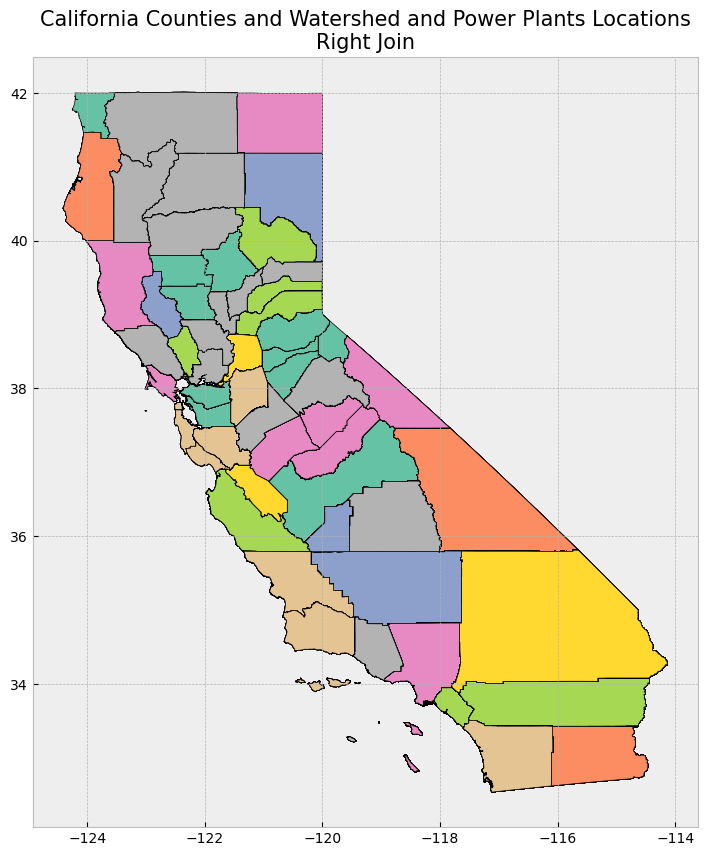

In [22]:
# Get inner join
right_join_result = gpd.sjoin(powerplants, counties, how = "right", predicate = 'within')

# Print head and tail of attribute table
display_table(table_name = "Right Join", attribute_table = right_join_result)

# Plot merge
plot_merge(merge_type = "Right Join", merge_result = right_join_result, merge_vector = "polygon")

The result is a dataframe with 1967 power plants (rows) which are the plants within California, versus the left join where we had 1996 plants (rows).

#### Inner Join

Finally, with an inner join, only the well locations that fall within the county boundaries are kept. These well locations have the county boundaries dataset appended to them. Because it’s an inner join, there are no resulting features with NaN as values in the attribute table.

Attribute Table: Inner Join

Table shape (rows, columns): (1965, 20)

First two rows:


CECPlantID                 PlantName  Retired_Pl        OperatorCo County  \
0      S0335  Corcoran 2 Solar LLC CED         0.0  RWE Clean Energy  Kings   
1      S0520          Corcoran 3 Solar         0.0  RWE Clean Energy  Kings   

   Capacity_L   Units PriEnergyS   StartDate CEC_Jurisd  \
0        19.8       1        SUN  2015-06-10          0   
1        20.0  Unit 1        SUN  2016-02-11          0   

                      geometry  index_right  OBJECTID          NAME  \
0  POINT (-119.56789 36.13717)           15        16  Kings County   
1  POINT (-119.57971 36.14432)           15        16  Kings County   

   STATE_NAME STATE_FIPS CNTY_FIPS   FIPS    Shape__Are     Shape__Len  
0  California         06       031  06031  5.531189e+09  354592.625713  
1  California         06       031  06031  5.531189e+09  354592.625713


Last two rows:


CECPlantID          PlantName  Retired_Pl  \
1719      S9054  San Miguel Winery         0.0   
1962      H0455  San Luis Obispo 1         0.0   

                                    OperatorCo           County  Capacity_L  \
1719                             Not Available  San Luis Obispo         1.0   
1962  California Department of Water Resources  San Luis Obispo         0.0   

     Units PriEnergyS   StartDate CEC_Jurisd                     geometry  \
1719     1        SUN  2012-01-01          0  POINT (-120.69690 35.76244)   
1962     1        WAT  1899-12-30          0  POINT (-120.65996 35.28261)   

      index_right  OBJECTID                    NAME  STATE_NAME STATE_FIPS  \
1719           39        40  San Luis Obispo County  California         06   
1962           39        40  San Luis Obispo County  California         06   

     CNTY_FIPS   FIPS    Shape__Are     Shape__Len  
1719       079  06079  1.296439e+10  782927.052252  
1962       079  06079  1.296439e+10  782927.052252

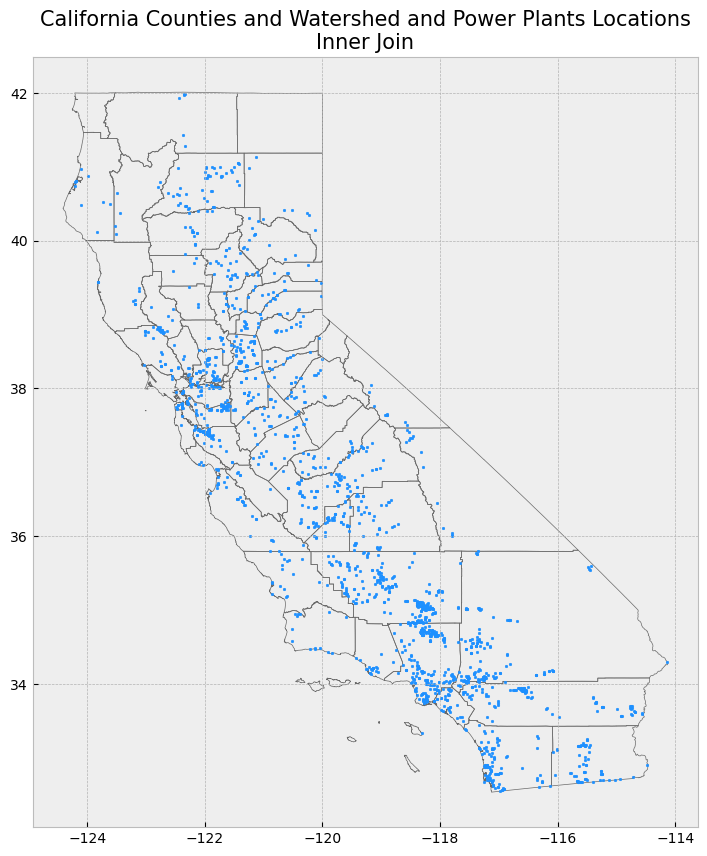

In [24]:
# Get inner join
inner_join_result = gpd.sjoin(powerplants, counties, how = "inner", predicate= 'within')

# Print head and tail of attribute table
display_table(table_name = "Inner Join", attribute_table = inner_join_result)

# Plot merge
plot_merge(merge_type = "Inner Join", merge_result = inner_join_result, merge_vector = "point")

# Merging spatial and non-spatial data
## Counting Power Plants and Calculating Average Capacity for Each County

In this section, we will perform a spatial join between the `counties` dataset and the `powerplants` dataset to count the number of power plants within each county and calculate the average power plant capacity.

The `sjoin()` function from `geopandas` will be used to join the `powerplants` dataset to the `counties` based on their spatial relationship. After the join, we will group the data by county and calculate the number of power plants and the average capacity for each county.


In [9]:
# Ensure counties and power plants are using the same CRS (California Albers)
counties_projected = counties.to_crs(epsg=3310)
powerplants_projected = powerplants.to_crs(epsg=3310)

# Perform spatial join to filter power plants within California counties only
plants_in_counties = gpd.sjoin(powerplants_projected, counties_projected, how="inner", predicate="within")

# Group by county and calculate the total number of power plants and the average capacity in each county
plant_count_by_county = plants_in_counties.groupby('NAME').size().reset_index(name='plant_count')
average_capacity_by_county = plants_in_counties.groupby('NAME')['Capacity_L'].mean().reset_index(name='average_capacity')

# Merge the two results into one dataframe
county_stats = plant_count_by_county.merge(average_capacity_by_county, on="NAME", how="right")

# Fill missing values for plant count and average capacity in counties with no plants
county_stats['plant_count'] = county_stats['plant_count'].fillna(0)
county_stats['average_capacity'] = county_stats['average_capacity'].fillna(0)

# Display the table
print("First 3 rows of county statistics:")
print(county_stats.head(3))

print("\nLast 3 rows of county statistics:")
print(county_stats.tail(3))

First 3 rows of county statistics:
             NAME  plant_count  average_capacity
0  Alameda County           46         49.108478
1   Alpine County            1          7.150000
2   Amador County            9         31.377778

Last 3 rows of county statistics:
              NAME  plant_count  average_capacity
53  Ventura County           21        118.166667
54     Yolo County           12          3.912500
55     Yuba County            8         47.268750


####  Merging Data

In this step, we aim to combine the power plant statistics that we've calculated (e.g., plant counts and average capacities) with the actual spatial data of the California counties.

Currently, the `county_stats` file contains information such as the number of power plants and average capacities by county, but **it lacks the necessary geospatial information** (like the county boundaries). To visualize these results on a map, we need to perform a **spatial join** with the `counties` file, which holds the geometries for each county.

By merging these two datasets using the common column `NAME`, we can create a new `GeoDataFrame` that includes both the statistical and spatial data for each county.

#### Steps to Follow:
1. Perform an **inner join** between `county_stats` and `counties` on the column `NAME`. This ensures we only include counties for which we have both spatial and statistical data.
2. Use the resulting `GeoDataFrame` to visualize the number of power plants for each county.
3. Add the county names and plant counts directly on the map for easy reference.

The following code demonstrates how to perform the merge and create a map:

The file plants in counties have multiple counts of power plants. Since we created a new file county stats, but it has not geospatial information, so we need to do a join with the counties file to get that information. 

   OBJECTID              NAME  STATE_NAME STATE_FIPS CNTY_FIPS   FIPS  \
0         1    Alameda County  California         06       001  06001   
1         2     Alpine County  California         06       003  06003   
2         3     Amador County  California         06       005  06005   
3         4      Butte County  California         06       007  06007   
4         5  Calaveras County  California         06       009  06009   

     Shape__Are     Shape__Len  \
0  3.084661e+09  448425.775672   
1  3.156006e+09  275565.131463   
2  2.562531e+09  359593.235353   
3  7.340033e+09  525974.550843   
4  4.356209e+09  367005.674344   

                                            geometry  plant_count  \
0  MULTIPOLYGON (((-122.19112 37.69298, -122.1910...           46   
1  POLYGON ((-119.90061 38.93077, -119.88726 38.9...            1   
2  POLYGON ((-120.07765 38.70889, -120.07771 38.7...            9   
3  POLYGON ((-121.40463 40.14665, -121.40489 40.1...           27   
4  POLYGON 

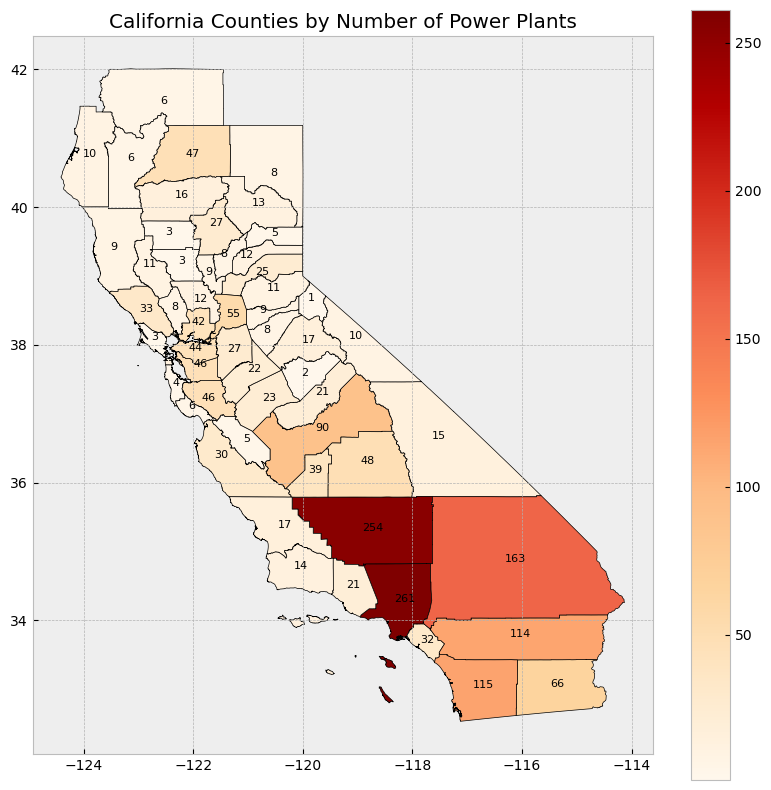

In [51]:
# Perform an inner join between county_stats and counties using the 'NAME' column
merged_gdf = counties.merge(county_stats, on='NAME', how='inner')

# Check the result
print(merged_gdf.head())

# Plot the merged data with geometries
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(ax=ax, column='plant_count', legend=True, cmap='OrRd', edgecolor='black')

# Add county names to the map using representative points
for x, y, label in zip(merged_gdf.geometry.representative_point().x, 
                       merged_gdf.geometry.representative_point().y, 
                       merged_gdf['plant_count']):
    ax.text(x, y, label, fontsize=8, ha='center')

# Set title and show the plot
plt.title('California Counties by Number of Power Plants')
plt.show()


# <u> VI.Data Transformation and Resampling</u>

## Raster Math
### SST Anomalies Difference (2000-2020 vs 1880-2020)

In this section, we will compute the difference between the sea surface temperature (SST) anomalies from two distinct time periods: **2000-2020** and **1880-2020**. This difference gives us an indication of how the anomalies have evolved between the two periods, highlighting changes in sea surface temperature over time.

#### Steps:

1. **Raster Math**: For each of the months of interest (March, April, July, and October), we calculate the difference between the SST anomalies in the 2000-2020 period and the 1880-2020 period. This is done by subtracting the mean anomalies of the earlier period from the later period.
   
   \[
   \text{Difference} = (\text{SST Anomaly}_{2000-2020}) - (\text{SST Anomaly}_{1880-2020})
   \]

2. **Color Scale**: A consistent color scale (`vmin=-1`, `vmax=1`) is applied to all plots, allowing us to compare the magnitude of differences across the maps.

3. **Map Visualization**: We use the `matplotlib` and `cartopy` libraries to visualize the difference in SST anomalies for each of the selected months (March, April, July, and October).

#### Output:

- The generated maps display the **difference in SST anomalies** for March, April, July, and October between the two time periods. The positive values (in red) indicate that SST anomalies are higher in the 2000-2020 period compared to the 1880-2020 period, while negative values (in blue) indicate lower SST anomalies in the recent period.

By comparing the maps, we can identify regions where sea surface temperatures have increased or decreased significantly over time, providing insights into the spatial patterns of ocean warming or cooling.


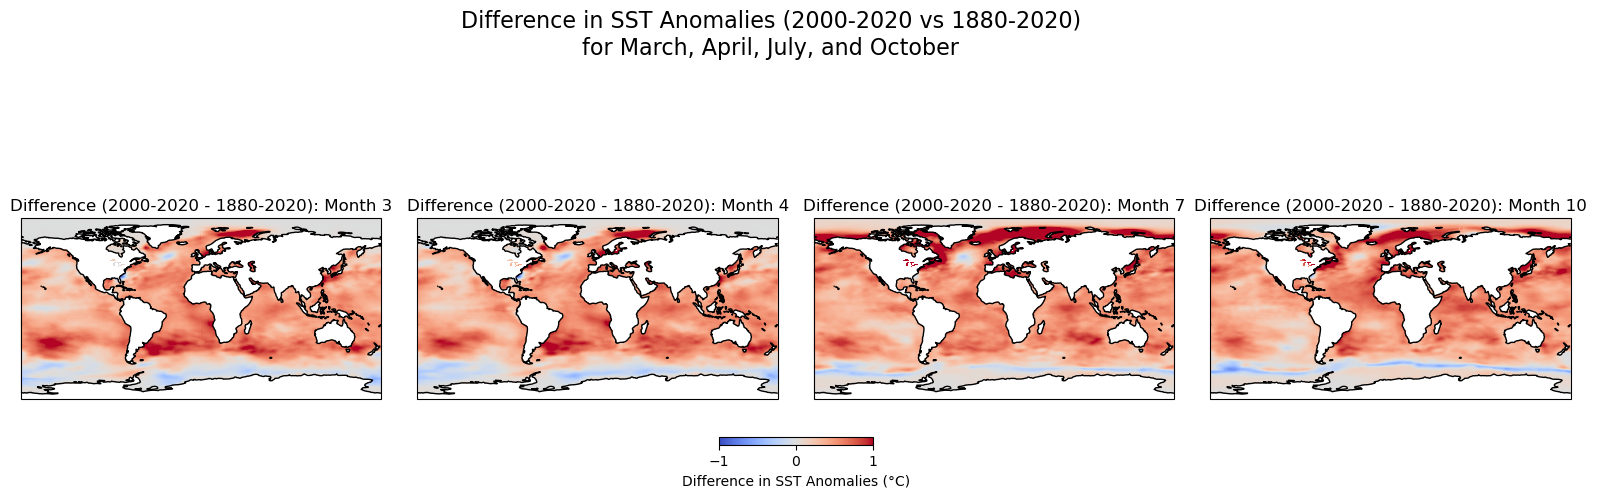

In [47]:
# Set up figure for subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 5), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Define color scale based on min/max of the difference anomalies for consistent comparison
vmin = -1  # Adjust based on your data range
vmax = 1   # Adjust based on your data range

# Plot the difference for the 4 months (2000-2020 - 1880-2020)
for i, month in enumerate(months_of_interest):
    ax = axes[i]
    ax.coastlines()
    ax.set_title(f'Difference (2000-2020 - 1880-2020): Month {month}')
    
    # Calculate the difference for the specific month
    monthly_avg_1880_2020 = calculate_monthly_averages(sst_full_range, months_full_range, month)
    monthly_avg_2000_2020 = calculate_monthly_averages(sst_recent_range, months_recent_range, month)
    
    # Compute the difference
    difference = monthly_avg_2000_2020 - monthly_avg_1880_2020
    
    # Plot the difference
    im = ax.pcolormesh(lon, lat, difference, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Add colorbar
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('Difference in SST Anomalies (°C)')

# Add main title
plt.suptitle('Difference in SST Anomalies (2000-2020 vs 1880-2020)\nfor March, April, July, and October', fontsize=16)

# Show plot
plt.show()

## Resampling Sea Surface Temperature (SST) Anomalies

Resampling is a crucial process when working with geospatial data. It involves modifying the spatial resolution of data, either by **upscaling** (increasing the grid size, reducing resolution) or **downscaling** (decreasing the grid size, increasing resolution). Resampling can be useful for comparing datasets of different resolutions or preparing data for models with specific resolution requirements.
Two common libraries used for this purpose are **Rasterio** and **Geowombat**, both of which provide various interpolation methods like "nearest neighbor", "bilinear", and "cubic convolution". 


In this section, we will:
1. **Upscale** the SST anomalies from their original 1-degree spatial resolution to 2-degree and 5-degree resolutions.
2. **Downscale** the SST anomalies to a higher resolution of 0.5 degrees.
3. **Visualize** the results, including zoomed-in views of a selected region, to compare how the resampling affects the data.

### Resampling Process

We use the `scipy.ndimage.zoom` function to perform the resampling. The zoom factor controls whether the data is upscaled or downscaled:
- A zoom factor less than 1 results in upscaling (e.g., 0.5 reduces resolution).
- A zoom factor greater than 1 results in downscaling (e.g., 2.0 increases resolution).

We apply the following resampling steps:
- **1 degree (original)**: The original dataset at 1-degree resolution.
- **2 degrees**: Upscaled by reducing the grid resolution by half.
- **5 degrees**: Upscaled further, reducing the grid size even more.
- **0.5 degrees**: Downscaled by doubling the grid density.


---

### Rasterio Upsampling Example
[Detailed example source](https://pygis.io/docs/e_raster_resample.html)

Occasionally, we need to resample our data to a coarser or finer resolution. For instance, if you need to reduce the memory footprint or compare datasets of different spatial resolutions, you might choose to upsample to a lower resolution. Here’s an example that demonstrates upsampling using **Rasterio**.

#### Steps:
1. Read in the dataset.
2. Apply the resampling method using an upscale factor.
3. Adjust the transform to reflect the new resolution.

```python
import rasterio
from rasterio.enums import Resampling

# Define input image path
image = "../data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF"

# Define upscale factor (2x higher resolution)
upscale_factor = 2

# Open the image using rasterio
with rasterio.open(image) as dataset:

    # Resample the data to the new shape
    data = dataset.read(
        out_shape=(
            dataset.count,
            int(dataset.height * upscale_factor),
            int(dataset.width * upscale_factor)
        ),
        resampling=Resampling.bilinear
    )

    # Print shape before and after resampling
    print('Shape before resample:', dataset.shape)
    print('Shape after resample:', data.shape[1:])

    # Adjust the transform to reflect new resolution
    dst_transform = dataset.transform * dataset.transform.scale(
        (dataset.width / data.shape[-1]),
        (dataset.height / data.shape[-2])
    )

    print('Transform before resample:\n', dataset.transform, '\n')
    print('Transform after resample:\n', dst_transform)




### Comparing Spatial Distributions
We visualize the SST anomalies for each of these resolutions on a global map. Additionally, we provide a zoomed-in view of a specific region to highlight how the resampling impacts local details. The color scale remains consistent across all maps to facilitate comparison.

By comparing the maps, we can observe how upscaling reduces the detail in the data, while downscaling introduces finer spatial details.2009-05-16

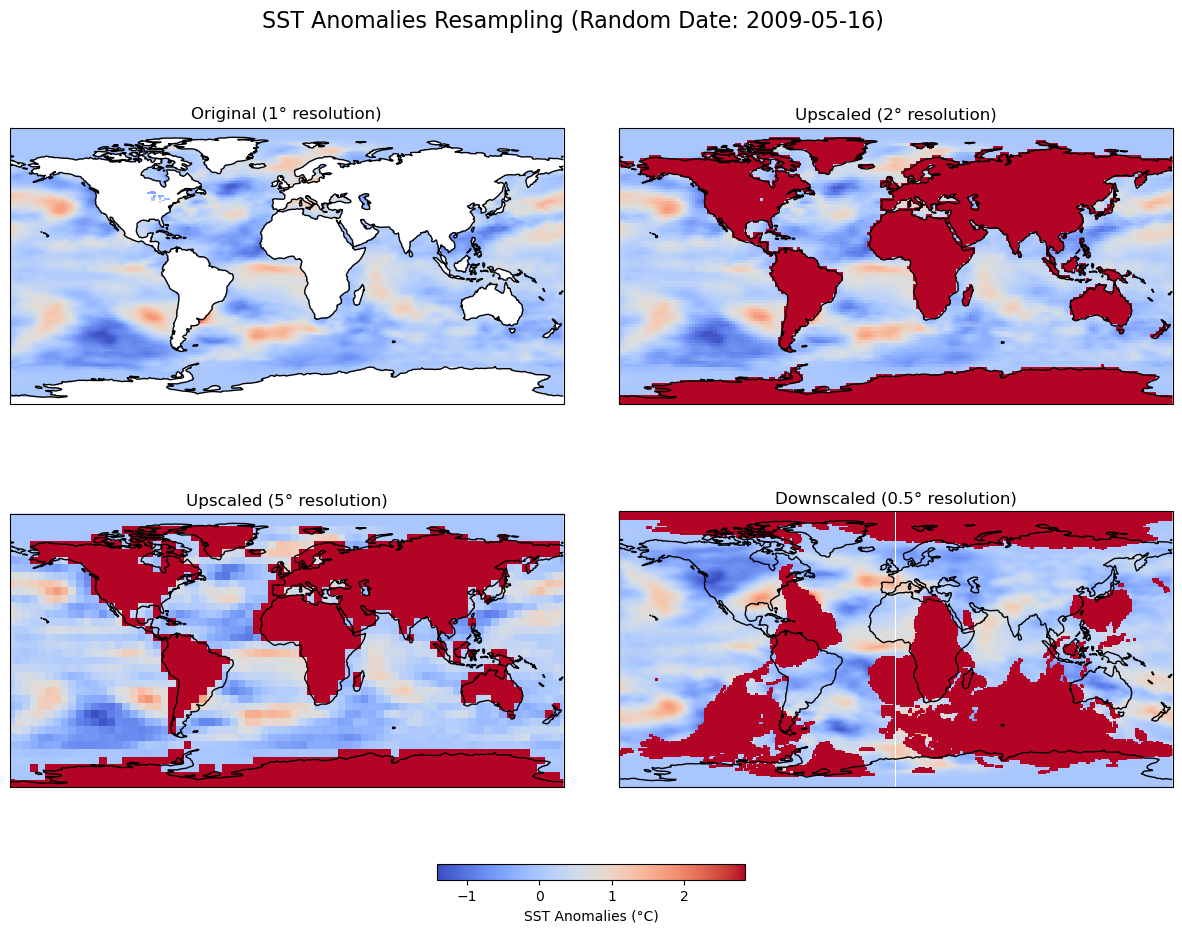

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from scipy.ndimage import zoom
from netCDF4 import num2date
import random

# Assuming 'time', 'sst', 'lat', 'lon' are already loaded from the NetCDF dataset

# Access the time units from the dataset (assuming you have already loaded the dataset as 'nc')
time_units = dataset['time'].units

# Convert the time variable to actual dates
dates = num2date(time[:], units=time_units, calendar='gregorian')

# Select a random date
random_index = random.randint(0, len(time) - 1)
sst_snapshot = sst[random_index, :, :]

# Mask NaN values (landmass areas)
mask = np.isnan(sst_snapshot)

# Resample the SST anomalies while preserving NaN values
# Upscale to 2 degrees (factor 0.5 in both dimensions)
sst_upscaled_2deg = zoom(np.where(mask, np.nan, sst_snapshot), zoom=0.5, order=1)
sst_upscaled_2deg = np.where(zoom(mask, zoom=0.5, order=0), np.nan, sst_upscaled_2deg)

# Upscale to 5 degrees (factor 0.2 in both dimensions)
sst_upscaled_5deg = zoom(np.where(mask, np.nan, sst_snapshot), zoom=0.2, order=1)
sst_upscaled_5deg = np.where(zoom(mask, zoom=0.2, order=0), np.nan, sst_upscaled_5deg)

# Downscale to 0.5 degrees (factor 2 in both dimensions)
sst_downscaled_05deg = zoom(np.where(mask, np.nan, sst_snapshot), zoom=2.0, order=1)
sst_downscaled_05deg = np.where(zoom(mask, zoom=2.0, order=0), np.nan, sst_downscaled_05deg)

# Get the actual date for the selected random index
selected_date = dates[random_index]

# Plot the resampled datasets
fig, axes = plt.subplots(2, 2, figsize=(15, 10), subplot_kw={'projection': ccrs.PlateCarree()})
plt.subplots_adjust(wspace=0.1, hspace=0.3)

# Set consistent color scale for comparison
vmin = np.nanmin(sst_snapshot)
vmax = np.nanmax(sst_snapshot)

# Original 1 degree resolution
axes[0, 0].coastlines()
axes[0, 0].set_title('Original (1° resolution)')
im1 = axes[0, 0].pcolormesh(lon, lat, sst_snapshot, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Upscaled to 2 degree resolution
axes[0, 1].coastlines()
axes[0, 1].set_title('Upscaled (2° resolution)')
im2 = axes[0, 1].pcolormesh(lon[::2], lat[::2], sst_upscaled_2deg, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Upscaled to 5 degree resolution
axes[1, 0].coastlines()
axes[1, 0].set_title('Upscaled (5° resolution)')
im3 = axes[1, 0].pcolormesh(lon[::5], lat[::5], sst_upscaled_5deg, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Downscaled to 0.5 degree resolution
axes[1, 1].coastlines()
axes[1, 1].set_title('Downscaled (0.5° resolution)')
im4 = axes[1, 1].pcolormesh(np.linspace(lon.min(), lon.max(), sst_downscaled_05deg.shape[1]),
                             np.linspace(lat.min(), lat.max(), sst_downscaled_05deg.shape[0]),
                             sst_downscaled_05deg, vmin=vmin, vmax=vmax, cmap='coolwarm')

# Add colorbar
cbar = fig.colorbar(im1, ax=axes.ravel().tolist(), orientation='horizontal', fraction=0.02, pad=0.1)
cbar.set_label('SST Anomalies (°C)')

# Use the selected date in the title
plt.suptitle(f'SST Anomalies Resampling (Random Date: {selected_date.strftime("%Y-%m-%d")})', fontsize=16)
plt.show()

### Downscaling 

The previous method for downscaling can be complex and be innacurate. To sucessfully use this approach an artificial intelligence architecture (AI) is recommended. 
Resampling data, especially downscaling, can be also simplified using **Geowombat**. This library makes it much easier to handle raster operations, particularly when it comes to changing spatial resolutions. Whether you need to upsample or downsample, **Geowombat** provides a straightforward way to handle raster data. The process involves setting the desired resolution (e.g., `ref_res`) and specifying the resampling method, such as "bilinear". After setting up these parameters, writing the file is much more intuitive than with other libraries like **Rasterio**.

#### Example: Downscaling with Geowombat

In this example, we'll downscale a Landsat image from a 30-meter resolution to a 15-meter resolution using bilinear resampling. **Geowombat** handles the resampling process in a few simple steps.

```python
import geowombat as gw

# Path to the input Landsat image
image = "../data/LC08_L1TP_224078_20200518_20200518_01_RT.TIF"

# Downscaling the image to 15-meter resolution using bilinear resampling
with gw.config.update(ref_res=15):
    with gw.open(image, resampling="bilinear") as src:
        print(src)

        # Optionally, save the resampled raster to a new file
        # src.gw.to_raster("../temp/LC08_20200518_15m.tif", overwrite=True)



Otherwise, using a file that overlaps in the study region but has the desired spatial resolution. For example, using MODIS data.

MODIS data comes in a sinusoidal projection at a 500m spatial resolution, whereas datasets like ERA5 or other global datasets typically use a lat/lon (geographic) projection and have coarser resolutions (e.g., 0.25° to 1°). If you want to resample a dataset like ERA5 to match the MODIS resolution or project MODIS data into a different spatial resolution, several steps need to be followed.

### 1. Understanding the Projections and Resampling

- **MODIS Projection:** MODIS data uses a sinusoidal (SIN) projection, which is different from the common lat/lon projections used by datasets like ERA5. This means that before you can resample the data, you will likely need to reproject the ERA5 data to match the MODIS sinusoidal projection.
  
- **Resampling Approach:** Resampling involves changing the spatial resolution of the dataset. For example:
    - **Upsampling:** Increasing the resolution, i.e., making each grid cell smaller.
    - **Downsampling:** Decreasing the resolution, i.e., making each grid cell larger.
  
  In our case, we want to resample ERA5 data to match the MODIS resolution, or to downsample MODIS data to match ERA5.

### 2. Using GDAL to Reproject and Resample Data

We can use the `GDAL` library in Python to handle reprojection and resampling tasks. Below is an outline of how to achieve this.

### 3. Resampling Example

Here’s an example of how you can resample ERA5 data to match MODIS resolution and projection using `gdalwarp`:

#### Step 1: Install GDAL
To use the GDAL library, you’ll need to install it:
```bash
!pip install gdal


#### Step 2: Resample ERA5 data to MODIS resolution (500m)

Here’s how you would resample ERA5 data to match MODIS 500m resolution, and reproject the data from lat/lon to sinusoidal projection.

```python

import os
from osgeo import gdal

# Input ERA5 file (assuming it's in GeoTIFF format)
input_file = 'era5_temperature.tif'

# Output resampled file to match MODIS
output_file = 'era5_resampled_to_modis.tif'

# MODIS Sinusoidal projection string (EPSG: 6842 for MODIS sinusoidal)
modis_proj = """
PROJCS["MODIS Sinusoidal",GEOGCS["GCS_unnamed ellipse",
DATUM["D_unknown",SPHEROID["Unknown",6371007.181,0]],
PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],
PROJECTION["Sinusoidal"],PARAMETER["false_easting",0],
PARAMETER["false_northing",0],PARAMETER["central_meridian",0],
UNIT["Meter",1]]
"""

# Use gdalwarp to reproject and resample
os.system(f"gdalwarp -t_srs '{modis_proj}' -tr 463.3127 463.3127 -r bilinear {input_file} {output_file}")

print(f"Resampled file saved as {output_file}")


The gdalwarp command is used to reproject the ERA5 data into the MODIS sinusoidal projection (-t_srs), and to resample the data to 500m (-tr 463.3127 463.3127 corresponds to 500m).-r bilinear specifies bilinear resampling to ensure smoother transitions between data points.

# <u>VII. Advanced Spatial Operations</u>

# Linear regression model, Pearson correlation, and root mean square error (RMSE)

Summary operations are useful for aggregating data,especially when you lack spatial boundaries or necessitate a more uniform unit to measure. Whether it be for analyzing overall trends or visualizing concentrations of data. Summarizing allows for effective analysis and communication of the data as compared to simply looking at or displaying points, lines, and polygons on a map.

This chapter will explore two summary operations that highlight concentrations of data: count points in a rectangular or hexagonal grid or by polygon and kernel density.

In [18]:
#Scaffold code to load in data.  This code cell is mostly data wrangling

def load_enso_indices():
  """
  Reads in the txt data file to output a pandas Series of ENSO vals

  outputs
  -------

    pd.Series : monthly ENSO values starting from 1870-01-01
  """
  with open('nino34.long.anom.data.txt') as f:
    line = f.readline()
    enso_vals = []
    while line:
        yearly_enso_vals = map(float, line.split()[1:])
        enso_vals.extend(yearly_enso_vals)
        line = f.readline()

  enso_vals = pd.Series(enso_vals)
  enso_vals.index = pd.date_range('1870-01-01',freq='MS',
                                  periods=len(enso_vals))
  enso_vals.index = pd.to_datetime(enso_vals.index)
  return enso_vals

def assemble_basic_predictors_predictands(start_date, end_date, lead_time,
                                    use_pca=False, n_components=32):
  """
  inputs
  ------

      start_date        str : the start date from which to extract sst
      end_date          str : the end date
      lead_time         str : the number of months between each sst
                              value and the target Nino3.4 Index
      use_pca          bool : whether or not to apply principal components
                              analysis to the sst field
      n_components      int : the number of components to use for PCA

  outputs
  -------
      Returns a tuple of the predictors (np array of sst temperature anomalies)
      and the predictands (np array the ENSO index at the specified lead time).

  """
  ds = xr.open_dataset('sst.mon.mean.trefadj.anom.1880to2018.nc')
  sst = ds['sst'].sel(time=slice(start_date, end_date))
  num_time_steps = sst.shape[0]

  #sst is a 3D array: (time_steps, lat, lon)
  #in this tutorial, we will not be using ML models that take
  #advantage of the spatial nature of global temperature
  #therefore, we reshape sst into a 2D array: (time_steps, lat*lon)
  #(At each time step, there are lat*lon predictors)
  sst = sst.values.reshape(num_time_steps, -1)
  sst[np.isnan(sst)] = 0

  #Use Principal Components Analysis, also called
  #Empirical Orthogonal Functions, to reduce the
  #dimensionality of the array
  if use_pca:
    pca = sklearn.decomposition.PCA(n_components=n_components)
    pca.fit(sst)
    X = pca.transform(sst)
  else:
    X = sst

  start_date_plus_lead = pd.to_datetime(start_date) + \
                        pd.DateOffset(months=lead_time)
  end_date_plus_lead = pd.to_datetime(end_date) + \
                      pd.DateOffset(months=lead_time)
  y = load_enso_indices()[slice(start_date_plus_lead,
                                end_date_plus_lead)]


  ds.close()
  return X, y

def plot_nino_time_series(y, predictions, title):
  """
  inputs
  ------
    y           pd.Series : time series of the true Nino index
    predictions np.array  : time series of the predicted Nino index (same
                            length and time as y)
    titile                : the title of the plot

  outputs
  -------
    None.  Displays the plot
  """
  predictions = pd.Series(predictions, index=y.index)
  predictions = predictions.sort_index()
  y = y.sort_index()

  plt.plot(y, label='Ground Truth')
  plt.plot(predictions, '--', label='ML Predictions')
  plt.legend(loc='best')
  plt.title(title)
  plt.ylabel('Nino3.4 Index')
  plt.xlabel('Date')
  plt.show()
  plt.close()

In [ ]:
# Sample loading of train, val, and test sets
X_train, y_train = assemble_basic_predictors_predictands('1980-01-01','1995-12-31', lead_time=1)
X_val, y_val = assemble_basic_predictors_predictands('1997-01-01','2006-12-31', lead_time=1)
X_test, y_test = assemble_basic_predictors_predictands('2007-01-01','2017-12-31', lead_time=1)

RMSE: 0.28


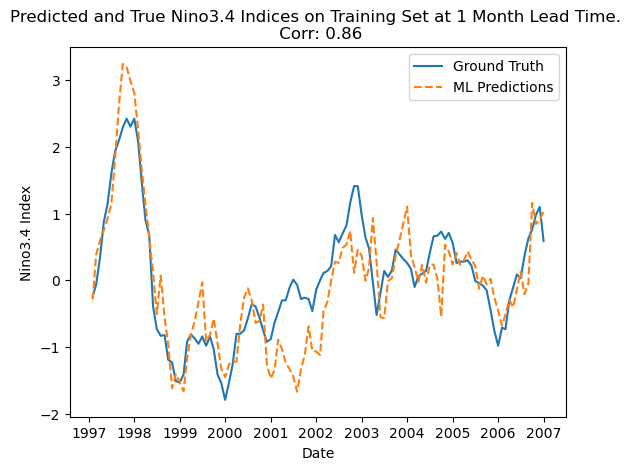

In [9]:
#Let's use a linear regression model
regr = sklearn.linear_model.LinearRegression()
regr.fit(X_train,y_train)

predictions = regr.predict(X_val)
corr, _ = scipy.stats.pearsonr(predictions, y_val)
rmse = mean_squared_error(y_val, predictions)
print("RMSE: {:.2f}".format(rmse))

plot_nino_time_series(y_val, predictions,
    'Predicted and True Nino3.4 Indices on Training Set at 1 Month Lead Time. \n Corr: {:.2f}'.format(corr))

# Point Density Measures - Kernel Density

In [35]:
# Reproject data to NAD83(HARN) / California Zone 3
# https://spatialreference.org/ref/epsg/2768/
proj = 3310
counties_projected2 = counties.to_crs(proj)
plants_in_counties2 = plants_in_counties.to_crs(proj)

In [53]:
print(plants_in_counties.columns)

Index(['CECPlantID', 'PlantName', 'Retired_Pl', 'OperatorCo', 'County',
       'Capacity_L', 'Units', 'PriEnergyS', 'StartDate', 'CEC_Jurisd',
       'geometry', 'index_right', 'OBJECTID', 'NAME', 'STATE_NAME',
       'STATE_FIPS', 'CNTY_FIPS', 'FIPS', 'Shape__Are', 'Shape__Len'],
      dtype='object')


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


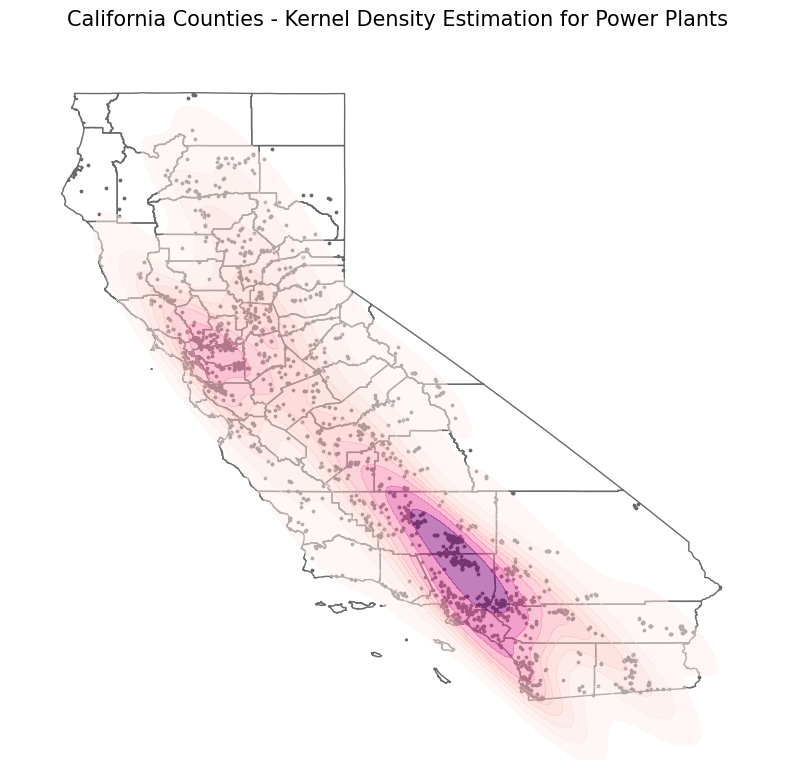

In [43]:
# Set projection to WGS 84 and reproject data if needed
proj_wgs = 4326
counties_wgs = counties.to_crs(proj_wgs)
plants_in_countie_wgs = plants_in_counties.to_crs(proj_wgs)

# Replace infinite values in the dataset with NaN and drop any rows with NaN values
plants_in_countie_wgs.replace([np.inf, -np.inf], np.nan, inplace=True)
plants_in_countie_wgs.dropna(inplace=True)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Plot counties
counties_wgs.plot(ax=ax, color='none', edgecolor='dimgray')

# Plot power plants
plants_in_countie_wgs.plot(ax=ax, marker='o', color='dimgray', markersize=3)

# Perform kernel density estimation (KDE) plot using geoplot
# Updated from 'shade' to 'fill' as per the warning in seaborn v0.14+
gplt.kdeplot(plants_in_countie_wgs, ax=ax, fill=True, cmap="RdPu", alpha=0.5)

# Set title
ax.set_title('California Counties - Kernel Density Estimation for Power Plants', fontdict={'fontsize': '15', 'fontweight': '3'})

# Show the plot
plt.show()

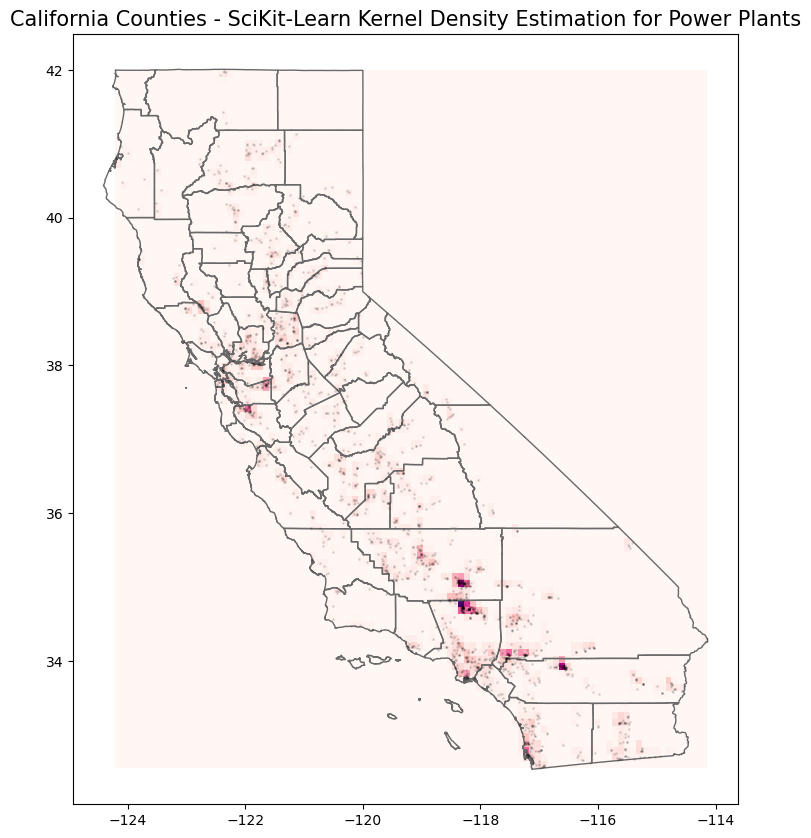

In [44]:
# Get X and Y coordinates of well points
x_sk = plants_in_countie_wgs["geometry"].x
y_sk = plants_in_countie_wgs["geometry"].y

# Get minimum and maximum coordinate values of well points
min_x_sk, min_y_sk, max_x_sk, max_y_sk = plants_in_countie_wgs.total_bounds

# Create a cell mesh grid
# Horizontal and vertical cell counts should be the same
XX_sk, YY_sk = np.mgrid[min_x_sk:max_x_sk:100j, min_y_sk:max_y_sk:100j]

# Create 2-D array of the coordinates (paired) of each cell in the mesh grid
positions_sk = np.vstack([XX_sk.ravel(), YY_sk.ravel()]).T

# Create 2-D array of the coordinate values of the well points
Xtrain_sk = np.vstack([x_sk, y_sk]).T

# Get kernel density estimator (can change parameters as desired)
kde_sk = KernelDensity(bandwidth = 0.04, metric = 'euclidean', kernel = 'gaussian', algorithm = 'auto')

# Fit kernel density estimator to wells coordinates
kde_sk.fit(Xtrain_sk)

# Evaluate the estimator on coordinate pairs
Z_sk = np.exp(kde_sk.score_samples(positions_sk))

# Reshape the data to fit mesh grid
Z_sk = Z_sk.reshape(XX_sk.shape)

# Plot data
fig, ax = plt.subplots(1, 1, figsize = (10, 10))
ax.imshow(np.rot90(Z_sk), cmap = "RdPu", extent = [min_x_sk, max_x_sk, min_y_sk, max_y_sk])
ax.plot(x_sk, y_sk, 'k.', markersize = 2, alpha = 0.1)
counties_wgs.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
ax.set_title('California Counties - SciKit-Learn Kernel Density Estimation for Power Plants', fontdict = {'fontsize': '15', 'fontweight' : '3'})
plt.show()

In [47]:
print(county_stats.head(3))

             NAME  plant_count  average_capacity
0  Alameda County           46         49.108478
1   Alpine County            1          7.150000
2   Amador County            9         31.377778


In [23]:
def create_grid(feature, shape, side_length):
    '''Create a grid consisting of either rectangles or hexagons with a specified side length that covers the extent of input feature.'''

    # Slightly displace the minimum and maximum values of the feature extent by creating a buffer
    # This decreases likelihood that a feature will fall directly on a cell boundary (in between two cells)
    # Buffer is projection dependent (due to units)
    feature = feature.buffer(200)

    # Get extent of buffered input feature
    min_x, min_y, max_x, max_y = feature.total_bounds


    # Create empty list to hold individual cells that will make up the grid
    cells_list = []

    # Create grid of squares if specified
    if shape in ["square", "rectangle", "box"]:

        # Adapted from https://james-brennan.github.io/posts/fast_gridding_geopandas/
        # Create and iterate through list of x values that will define column positions with specified side length
        for x in np.arange(min_x - side_length, max_x + side_length, side_length):

            # Create and iterate through list of y values that will define row positions with specified side length
            for y in np.arange(min_y - side_length, max_y + side_length, side_length):

                # Create a box with specified side length and append to list
                cells_list.append(box(x, y, x + side_length, y + side_length))


    # Otherwise, create grid of hexagons
    elif shape == "hexagon":

        # Set horizontal displacement that will define column positions with specified side length (based on normal hexagon)
        x_step = 1.5 * side_length

        # Set vertical displacement that will define row positions with specified side length (based on normal hexagon)
        # This is the distance between the centers of two hexagons stacked on top of each other (vertically)
        y_step = math.sqrt(3) * side_length

        # Get apothem (distance between center and midpoint of a side, based on normal hexagon)
        apothem = (math.sqrt(3) * side_length / 2)

        # Set column number
        column_number = 0

        # Create and iterate through list of x values that will define column positions with vertical displacement
        for x in np.arange(min_x, max_x + x_step, x_step):

            # Create and iterate through list of y values that will define column positions with horizontal displacement
            for y in np.arange(min_y, max_y + y_step, y_step):

                # Create hexagon with specified side length
                hexagon = [[x + math.cos(math.radians(angle)) * side_length, y + math.sin(math.radians(angle)) * side_length] for angle in range(0, 360, 60)]

                # Append hexagon to list
                cells_list.append(Polygon(hexagon))

            # Check if column number is even
            if column_number % 2 == 0:

                # If even, expand minimum and maximum y values by apothem value to vertically displace next row
                # Expand values so as to not miss any features near the feature extent
                min_y -= apothem
                max_y += apothem

            # Else, odd
            else:

                # Revert minimum and maximum y values back to original
                min_y += apothem
                max_y -= apothem

            # Increase column number by 1
            column_number += 1

    # Else, raise error
    else:
        raise Exception("Specify a rectangle or hexagon as the grid shape.")

    # Create grid from list of cells
    grid = gpd.GeoDataFrame(cells_list, columns = ['geometry'], crs = proj)

    # Create a column that assigns each grid a number
    grid["Grid_ID"] = np.arange(len(grid))

    # Return grid
    return grid

In [29]:
# Set side length for cells in grid
# This is dependent on projection chosen as length is in units specified in projection
side_length = 5000

# Set shape of grid
shape = "hexagon"
# shape = "rectangle"

Text(0.5, 1.0, 'California Counties Area - Boundaries, Power Plants, and Grids')

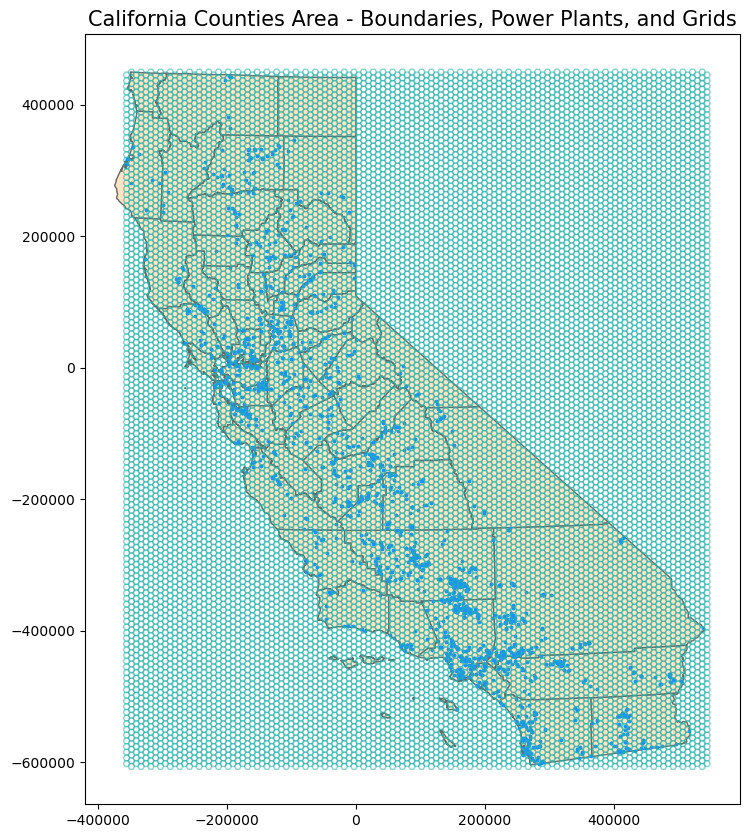

In [36]:
# Create grid
cali_area_grid = create_grid(feature = plants_in_counties2, shape = shape, side_length = side_length)

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties_projected2.plot(ax = ax, color = 'bisque', edgecolor = 'dimgray')
plants_in_counties2.plot(ax = ax, marker = 'o', color = 'dodgerblue', markersize = 3)
bay_area_grid.plot(ax = ax, color = 'none', edgecolor = 'lightseagreen', alpha = 0.55)

# Set title
ax.set_title('California Counties Area - Boundaries, Power Plants, and Grids', fontdict = {'fontsize': '15', 'fontweight' : '3'})

In [58]:
# Perform spatial join, merging attribute table of wells point and that of the cell with which it intersects
# op = "intersects" also counts those that fall on a cell boundary (between two cells)
# op = "within" will not count those fall on a cell boundary
powerplant_cell = gpd.sjoin(plants_in_counties, cali_area_grid, how = "inner", predicate = "intersects")

# Remove duplicate counts
# With intersect, those that fall on a boundary will be allocated to all cells that share that boundary
powerplant_cell = powerplant_cell.drop_duplicates(subset = ['CECPlantID']).reset_index(drop = True)

# Set field name to hold count value
count_field = "Count"

# Add a field with constant value of 1
powerplant_cell[count_field] = 1

# Group GeoDataFrame by cell while aggregating the Count values
powerplant_cell = powerplant_cell.groupby('Grid_ID').agg({count_field:'sum'})

# Merge the resulting grouped dataframe with the grid GeoDataFrame, using a left join to keep all cell polygons
cali_area_grid = cali_area_grid.merge(powerplant_cell, on = 'Grid_ID', how = "left")

# Fill the NaN values (cells without any points) with 0
cali_area_grid[count_field] = cali_area_grid[count_field].fillna(0)

# Convert Count field to integer
cali_area_grid[count_field] = cali_area_grid[count_field].astype(int)

# Display grid attribute table
display(cali_area_grid)

NameError: name 'gpd' is not defined

In [57]:
# Perform spatial join, specifying custom suffixes to avoid conflicts
powerplant_cell = gpd.sjoin(plants_in_counties, cali_area_grid, how="inner", predicate="intersects", lsuffix="left", rsuffix="right")

# Remove duplicate counts
# With intersect, those that fall on a boundary will be allocated to all cells that share that boundary
powerplant_cell = powerplant_cell.drop_duplicates(subset=['CECPlantID']).reset_index(drop=True)

# Set field name to hold count value
count_field = "Count"

# Add a field with a constant value of 1 (since we're counting the power plants)
powerplant_cell[count_field] = 1

# Group GeoDataFrame by cell while aggregating the Count values
powerplant_cell = powerplant_cell.groupby('Grid_ID').agg({count_field: 'sum'}).reset_index()

# Merge the resulting grouped dataframe with the grid GeoDataFrame, using a left join to keep all cell polygons
cali_area_grid = cali_area_grid.merge(powerplant_cell, on='Grid_ID', how="left")

# Fill the NaN values (cells without any points) with 0
cali_area_grid[count_field] = cali_area_grid[count_field].fillna(0)

# Convert Count field to integer
cali_area_grid[count_field] = cali_area_grid[count_field].astype(int)

# Display grid attribute table
display(cali_area_grid)

# Plot the grid with power plant counts
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
cali_area_grid.plot(ax=ax, column=count_field, cmap='OrRd', edgecolor='black', legend=True)
plt.title('Grid of Power Plant Counts in California')
plt.show()


NameError: name 'gpd' is not defined

KeyError: 'Count'

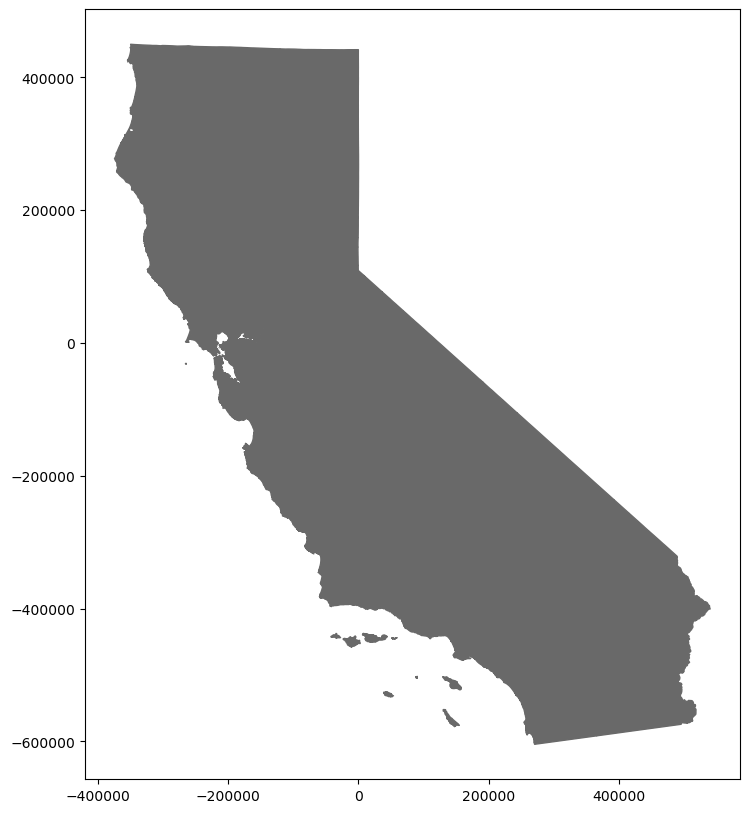

In [19]:
# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Plot data
counties_projected.plot(ax = ax, color = 'none', edgecolor = 'dimgray')
counties_projected.plot(ax = ax, marker = 'o', color = 'dimgray', markersize = 3)
cali_area_grid.plot(ax = ax, column = "Count", cmap = "RdPu", edgecolor = 'lightseagreen', linewidth = 0.5, alpha = 0.70, legend = True)

# Set title
ax.set_title('San Francisco Bay Area - Binning Well Points', fontdict = {'fontsize': '15', 'fontweight' : '3'})